## Testando dot_real

In [1]:
import bruno as br
import numpy as np
import pytest

In [2]:
def test_dot_real_not_1D_arrays():
    x = np.array([[1.0, 2.0], [3.0, 4.0]])  # Array 2D
    y = np.array([4.0, 5.0])
    
    try:
        br.dot_real(x, y)
    except AssertionError as e:
        print("Erro esperado detectado:", e)

test_dot_real_not_1D_arrays()


Erro esperado detectado: x deve ser 1D com ndim = 1: uma dimensão [1, 2, 3]..


In [3]:
def test_dot_real_different_sizes():
    x = np.array([1.0, 2.0])
    y = np.array([4.0, 5.0, 6.0])
    
    try:
        br.dot_real(x, y)
    except AssertionError as e:
        print("Erro esperado detectado:", e)

test_dot_real_different_sizes()


Erro esperado detectado: Numero de elementos em x é diferente de numero de elementos em y


In [4]:
def test_dot_real_known_values():
    x = np.array([1.0, 2.0, 3.0])
    y = np.array([4.0, 5.0, 6.0])
    
    resultado = br.dot_real(x, y)
    print("Resultado esperado (32):", resultado)

test_dot_real_known_values()


Resultado esperado (32): 32.0


In [5]:
def test_dot_real_compare_numpy_dot():
    x = np.array([1.0, 2.0, 3.0])
    y = np.array([4.0, 5.0, 6.0])
    
    resultado_custom = br.dot_real(x, y)
    resultado_numpy = np.dot(x, y)
    
    print("Comparação com numpy.dot:", resultado_custom == resultado_numpy)

test_dot_real_compare_numpy_dot()


Comparação com numpy.dot: True


In [6]:
def test_dot_real_commutativity():
    x = np.array([1.0, 2.0, 3.0])
    y = np.array([4.0, 5.0, 6.0])
    
    resultado_xy = br.dot_real(x, y)
    resultado_yx = br.dot_real(y, x)
    
    print("Testando comutatividade (x·y == y·x):", resultado_xy == resultado_yx)

test_dot_real_commutativity()


Testando comutatividade (x·y == y·x): True


In [7]:
def test_dot_real_distributivity():
    x = np.array([1.0, 2.0, 3.0])
    y = np.array([4.0, 5.0, 6.0])
    z = np.array([7.0, 8.0, 9.0])
    
    resultado_distributivo = br.dot_real(x, y + z)
    resultado_separado = br.dot_real(x, y) + br.dot_real(x, z)
    
    print("Testando distributividade:", resultado_distributivo == resultado_separado)

test_dot_real_distributivity()


Testando distributividade: True


In [8]:
def test_dot_real_scalar_multiplication():
    x = np.array([1.0, 2.0, 3.0])
    y = np.array([4.0, 5.0, 6.0])
    escalar = 3
    
    resultado_escalar = br.dot_real(br.scalar_vec_real(escalar, x), y)
    resultado_multiplicado = escalar * br.dot_real(x, y)
    
    print("Testando multiplicação escalar:", resultado_escalar == resultado_multiplicado)

test_dot_real_scalar_multiplication()


Testando multiplicação escalar: True


###### na minha função construi para ele n calcular vetores do tipo complexa vai gerar o seguinte erro

In [9]:
def test_dot_real_ignore_complex():
    x = np.array([1.0 + 2.0j, 2.0, 3.0])
    y = np.array([4.0, 5.0, 6.0])
    
    try:
        resultado = br.dot_real(x, y)
    except AssertionError as e:
        print("Erro esperado detectado:", e)
        resultado = br.dot_real(x.real, y.real)
        print("Resultado ignorando partes imaginárias:", resultado)  # Esperado: 1*4 + 2*5 + 3*6 = 32
    

test_dot_real_ignore_complex()


Erro esperado detectado: O array x contém valores que não são números reais
Resultado ignorando partes imaginárias: 32.0


In [10]:
def test_dot_complex_compare_numpy_dot():
    x = np.array([1.0 + 2.0j, 2.0, 3.0])
    y = np.array([4.0, 5.0, 6.0])
    
    resultado_custom = br.dot_real(x.real, y)
    resultado_numpy = np.dot(x.real, y)  # Considera apenas a parte real
    
    print("Comparação com numpy.dot ignorando parte imaginária:", resultado_custom == resultado_numpy)

test_dot_complex_compare_numpy_dot()


Comparação com numpy.dot ignorando parte imaginária: True


### Usando dot_product

In [11]:


def test_dot_real_not_1D_arrays():
    'fail due to input that is not 1D array'
    vector_1 = np.ones((3,2))
    vector_2 = np.arange(4)
    try:
        br.dot_real(vector_1, vector_2)
    except AssertionError as e:
        print("Erro esperado detectado:", e)
        
def test_dot_real_different_sizes():
    'fail due to inputs having different sizes'
    vector_1 = np.linspace(5,6,7)
    vector_2 = np.arange(4)
    try:
        br.dot_real(vector_1, vector_2)
    except AssertionError as e:
        print("Erro esperado detectado:", e)


def test_dot_real_known_values():
    'check output produced by specific input'
    vector_1 = 0.1*np.ones(10)
    vector_2 = np.linspace(23.1, 52, 10)
    reference_output = np.mean(vector_2)
    computed_output = br.dot_real(vector_1, vector_2)
    return np.allclose(reference_output, computed_output, rtol=10)


def test_dot_real_compare_numpy_dot():
    'compare with numpy.dot'
    # set random generator
    rng = np.random.default_rng(12765)
    # use the random generator to create input parameters
    vector_1 = rng.random(13)
    vector_2 = rng.random(13)
    reference_output_numpy = br.dot_real(vector_1, vector_2)
    return np.allclose(reference_output_numpy, np.dot(vector_1, vector_2), rtol=10)


def test_dot_real_commutativity():
    'verify commutativity'
    # set random generator
    rng = np.random.default_rng(555543127)
    # use the random generator to create input parameters
    a = rng.random(15)
    b = rng.random(15)
    # a dot b = b dot a
    output_ab = br.dot_real(a, b)
    output_ba = br.dot_real(b, a)
    return np.allclose(output_ab, output_ba, rtol=10)


def test_dot_real_distributivity():
    'verify distributivity over sum'
    # set random generator
    rng = np.random.default_rng(555543127)
    # use the random generator to create input parameters
    a = rng.random(15)
    b = rng.random(15)
    c = rng.random(15)
    # a dot (b + c) = (a dot b) + (a dot c)
    output_a_bc = br.dot_real(a, b + c)
    output_ab_ac = br.dot_real(a, b) + br.dot_real(a, c)
    return np.allclose(output_a_bc, output_ab_ac, rtol=10)


def test_dot_real_scalar_multiplication():
    'verify scalar multiplication property'
    # set random generator
    rng = np.random.default_rng(333543127)
    # use the random generator to create input parameters
    a = rng.random(15)
    b = rng.random(15)
    c1 = 5.6
    c2 = 9.1
    # (c1 a) dot (c2 b) = c1c2 (a dot b)
    output_c1a_c2b = br.dot_real(c1*a, c2*b)
    output_c1c2_ab = c1*c2*br.dot_real(a, b)
    return np.allclose(output_c1a_c2b, output_c1c2_ab, rtol=10)


def test_dot_real_ignore_complex():
    'complex part of input must be ignored'
    vector_1 = 0.1*np.ones(10)
    vector_2 = np.linspace(23.1, 52, 10) - 1j*np.ones(10)
    reference_output = np.mean(vector_2.real)
    computed_output = br.dot_real(vector_1, vector_2.real)
    return np.allclose(reference_output, computed_output, rtol=10)


def test_dot_complex_compare_numpy_dot():
    'compare dot_complex, numpy and numba with numpy.dot'
    # set random generator
    rng = np.random.default_rng(1111763412)
    # use the random generator to create input parameters
    vector_1 = rng.random(13) + 1j*rng.random(13)
    vector_2 = rng.random(13) + 1j*rng.random(13)
    output = br.dot_complex(vector_1.real, vector_2.real)
    output_numpy_dot = np.dot(vector_1, vector_2)
    return np.allclose(output, output_numpy_dot.real, rtol=10)

In [12]:
test_dot_real_not_1D_arrays()

Erro esperado detectado: Numero de elementos em x é diferente de numero de elementos em y


In [13]:
test_dot_real_different_sizes()

Erro esperado detectado: Numero de elementos em x é diferente de numero de elementos em y


In [14]:
test_dot_real_known_values()

True

In [15]:
test_dot_real_compare_numpy_dot()

True

In [16]:
test_dot_real_commutativity()

True

In [17]:
test_dot_real_distributivity()

True

In [18]:
test_dot_real_scalar_multiplication()

True

In [19]:
test_dot_real_ignore_complex()

True

In [20]:
test_dot_complex_compare_numpy_dot()

True

# Hadamard product

In [21]:
import bruno as br
import numpy as np
import pytest
from numpy.testing import assert_almost_equal as aae

In [22]:
# Hadamard product

def test_hadamard_real_different_shapes():
    'fail if input variables have different sizes'
    a = np.linspace(5,10,8)
    B = np.ones((4,4))
    try:
        br.hadamard_real_vector(a, B)
    except AssertionError as e:
        print(e)


def test_hadamard_real_compare_asterisk():
    'compare hadamard_real function with * operator'
    # for vectors
    # set random generator
    rng = np.random.default_rng(11117665544444412)
    # use the random generator to create input parameters
    input1 = rng.random(18)
    input2 = rng.random(18)
    try:
        output = br.hadamard_real_vector(input1, input2)
        output_asterisk = input1*input2
        aae(output, output_asterisk, decimal=10)
    except AssertionError as e:
        print(e)
    try:
        # for matrices
        input1 = rng.random((5, 7))
        input2 = rng.random((5, 7))
        output = br.hadamard_real_matrix(input1, input2)
        output_asterisk = input1*input2
        print(np.allclose(output, output_asterisk, rtol=10))
    except AssertionError as e:
        print(e)
    


def test_hadamard_real_ignore_complex():
    'complex part of input must be ignored'
    # for vectors
    # set random generator
    rng = np.random.default_rng(9999999917665544444412)
    # use the random generator to create input parameters
    input1 = rng.random(10)
    input2 = rng.random(10) + 1j*np.ones(10)
    try:
        
        output = br.hadamard_real_vector(np.real(input1), np.real(input2.real))
        output_reference = input1.real*input2.real
        print(output)
        return np.allclose(output, output_reference, rtol=10)
       
    except AssertionError as e:
        print(e)
     # for matrices
    input1 = rng.random((5, 7)) - 1j*np.ones((5,7))
    input2 = rng.random((5, 7))
    try:
        output = br.hadamard_real_matrix(input1.real, input2.real)
        output_reference = input1.real*input2.real
        print(output)
        return np.allclose(output, output_reference, rtol=10)
    except AssertionError as e:
        print(e)


def test_hadamard_complex_compare_asterisk():
    'compare hadamard_complex function with * operator'
    #for vectors
    # set random generator
    rng = np.random.default_rng(777799917665544444412)
    input1 = rng.random((4, 3))
    input2 = rng.random((4, 3))
    try:
        output =  br.hadamard_complex_vector(input1, input2)
        output_asterisk = input1*input2
        np.allclose(output, output_asterisk, rtol=10)
    except AssertionError as err:
        print(err)
    # for matrices
    try:
        output = br.hadamard_complex_matrix(input1, input2)
        output_asterisk = input1*input2
        np.allclose(output, output_asterisk, rtol=10)
    except AssertionError as err:
        print(err)

In [23]:
test_hadamard_real_different_shapes()

Os vetores devem ter o mesmo tamanho.


In [24]:
test_hadamard_real_compare_asterisk()

True


In [25]:
test_hadamard_real_ignore_complex()

[0.41265301 0.2352869  0.32796779 0.08889215 0.03546227 0.16680992
 0.78187705 0.4990065  0.03409233 0.14555901]


True

In [26]:
test_hadamard_complex_compare_asterisk()

Os vetores x e y devem ser 1D.
A matriz não é do conjuto do complexo, por favor. verifique os dados!


# Outer 

In [27]:
from numpy.testing import assert_almost_equal as aae
import pytest
import bruno as br
import numpy as np

def test_outer_real_input_not_vector():
    'fail with non-vector inputs'
    a = np.linspace(5,10,8)
    B = np.ones((4,4))
    try:
        br.outer_real(a, B)
    except AssertionError as err: 
        print(err)
    except ArithmeticError as err: 
        print(err)
    try:
        br.outer_real_row(a, B)
    except AssertionError as err:
        print(err)
    except ArithmeticError as err: 
        print(err)
    try:
        br.outer_real_column(a, B)
    except AssertionError as err:
        print(err)
    except ArithmeticError as err: 
        print(err)


def test_outer_real_compare_numpy_outer():
    'compare with numpy.outer'
    # set random generator
    rng = np.random.default_rng(555799917665544441234)
    vector_1 = rng.random(13)
    vector_2 = rng.random(13)
    try: 
        reference_output_numpy = np.outer(vector_1, vector_2)
        computed_output_simple = br.outer_real(vector_1, vector_2)
        computed_output_row = br.outer_real_row(vector_1, vector_2)
        computed_output_column = br.outer_real_column(vector_1, vector_2)
        print(
        np.allclose(reference_output_numpy, computed_output_simple, rtol=10),
        np.allclose(reference_output_numpy, computed_output_row, rtol=10),
        np.allclose(reference_output_numpy, computed_output_column, rtol=10)
        )
   
    except AssertionError as err: 
        print(err)
    except ArithmeticError as err: 
        print(err)

def test_outer_real_known_values():
    'check output produced by specific input'
    try:
        vector_1 = np.ones(5)
        vector_2 = np.arange(1,11)
        reference_output = np.resize(vector_2, (vector_1.size, vector_2.size))
        computed_output_simple = br.outer_real(vector_1, vector_2)
        computed_output_row = br.outer_real_row(vector_1, vector_2)
        computed_output_column = br.outer_real_column(vector_1, vector_2)
        print(
        np.allclose(reference_output, computed_output_simple, rtol=10),
        np.allclose(reference_output, computed_output_row, rtol=10),
        np.allclose(reference_output, computed_output_column, rtol=10)
        )
    except ArithmeticError as e:
        print(e)
    except AssertionError as a:
        print(a)
    except ValueError as v:
        print(v)
def test_outer_real_transposition():
    'verify the transposition property'
    # set random generator
    rng = np.random.default_rng(555799917665544441234)
    a = rng.random(8)
    b = rng.random(5)
    try:
        a_outer_b_T_simple = br.outer_real(a, b).T
        b_outer_a_simple = br.outer_real(b, a)
        a_outer_b_T_row = br.outer_real_row(a, b).T
        b_outer_a_row = br.outer_real_row(b, a)
        a_outer_b_T_column = br.outer_real_column(a, b).T
        b_outer_a_column = br.outer_real_column(b, a)
        print(
        np.allclose(a_outer_b_T_simple, b_outer_a_simple, rtol=10),
        np.allclose(a_outer_b_T_row, b_outer_a_row, rtol=10),
        np.allclose(a_outer_b_T_column, b_outer_a_column, rtol=10)
        )
    except ArithmeticError as e:
        print(e)
    except AssertionError as a:
        print(a)
    except ValueError as v:
        print(v)


def test_outer_real_distributivity():
    'verify the distributivity property'
    rng = np.random.default_rng(111555799917665544441)
    a = rng.random(5)
    b = rng.random(5)
    c = rng.random(4)
    
    try:
        # Testando distributividade com a função outer_real
        a_plus_b_outer_c_simple = br.outer_real(a + b, c)
        a_outer_c_plus_b_outer_c_simple = (
            br.outer_real(a, c) + br.outer_real(b, c)
        )
        assert np.allclose(a_plus_b_outer_c_simple, a_outer_c_plus_b_outer_c_simple, rtol=1e-5), \
            "Falha na verificação de distributividade (simple)"
    
    except ArithmeticError as e:
        print(f"ArithmeticError: {e}")
    except AssertionError as a:
        print(f"AssertionError: {a}")
    except ValueError as v:
        print(f"ValueError: {v}")
    
    try:
        # Testando distributividade com a função outer_real_row
        a_plus_b_outer_c_row = br.outer_real_row(a + b, c)
        a_outer_c_plus_b_outer_c_row = (
            br.outer_real_row(a, c) + br.outer_real_row(b, c)
        )
        assert np.allclose(a_plus_b_outer_c_row, a_outer_c_plus_b_outer_c_row, rtol=1e-5), \
            "Falha na verificação de distributividade (row)"
    
    except ArithmeticError as e:
        print(f"ArithmeticError: {e}")
    except AssertionError as a:
        print(f"AssertionError: {a}")
    except ValueError as v:
        print(f"ValueError: {v}")
    
    try:
        # Testando distributividade com a função outer_real_column
        a_plus_b_outer_c_column = br.outer_real_column(a + b, c)
        a_outer_c_plus_b_outer_c_column = (
            br.outer_real_column(a, c) + br.outer_real_column(b, c)
        )
        assert np.allclose(a_plus_b_outer_c_column, a_outer_c_plus_b_outer_c_column, rtol=1e-5), \
            "Falha na verificação de distributividade (column)"
        
    except ArithmeticError as e:
        print(f"ArithmeticError: {e}")
    except AssertionError as a:
        print(f"AssertionError: {a}")
    except ValueError as v:
        print(f"ValueError: {v}")

        
        

def test_outer_real_distributivity():
    'Verify the distributivity property'
    rng = np.random.default_rng(111555799917665544441)
    a = rng.random(5)
    b = rng.random(5)
    c = rng.random(4)
    
    try:
        # Testando distributividade com a função outer_real
        a_plus_b_outer_c_simple = br.outer_real(a + b, c)
        a_outer_c_plus_b_outer_c_simple = (
            br.outer_real(a, c) + br.outer_real(b, c)
        )
        l = np.allclose(a_plus_b_outer_c_simple, a_outer_c_plus_b_outer_c_simple, rtol=10)
        print(l)
    except ArithmeticError as e:
        print(f"ArithmeticError: {e}")
    except AssertionError as a:
        print(f"AssertionError: {a}")
    except ValueError as v:
        print(f"ValueError: {v}")
    
    try:
        # Testando distributividade com a função outer_real_row
        a_plus_b_outer_c_row = br.outer_real_row(a + b, c)
        a_outer_c_plus_b_outer_c_row = (
            br.outer_real_row(a, c) + br.outer_real_row(b, c)
        )
        l = np.allclose(a_plus_b_outer_c_row, a_outer_c_plus_b_outer_c_row, rtol=10)
        print(l)
    except ArithmeticError as e:
        print(f"ArithmeticError: {e}")
    except AssertionError as a:
        print(f"AssertionError: {a}")
    except ValueError as v:
        print(f"ValueError: {v}")
    
    try:
        # Testando distributividade com a função outer_real_column
        a_plus_b_outer_c_column = br.outer_real_column(a + b, c)
        a_outer_c_plus_b_outer_c_column = (
            br.outer_real_column(a, c) + br.outer_real_column(b, c)
        )
        l = np.allclose(a_plus_b_outer_c_column, a_outer_c_plus_b_outer_c_column, rtol=10)
        print(l)
    except ArithmeticError as e:
        print(f"ArithmeticError: {e}")
    except AssertionError as a:
        print(f"AssertionError: {a}")
    except ValueError as v:
        print(f"ValueError: {v}")


def test_outer_real_ignore_complex():
    'complex part of input must be ignored'
    vector_1 = np.ones(5) - 0.4j*np.ones(5)
    vector_1 = vector_1.real
    vector_2 = np.arange(1,11)
    vector_2 = vector_2.real
    reference_output = np.resize(vector_2, (vector_1.size, vector_2.size))
    outer_real = {
        'simple' : br.outer_real,
        'row' : br.outer_real_row,
        'column' : br.outer_real_column
    }
    try:
        computed_output = []
        for function in ['simple', 'row', 'column']:
            computed_output.append(outer_real[function](vector_1, vector_2))
        print(np.allclose(reference_output, computed_output[0], rtol=10),
        np.allclose(reference_output, computed_output[1], rtol=10),
        np.allclose(reference_output, computed_output[2], rtol=10)
        )
    except ArithmeticError as e:
        print(f"ArithmeticError: {e}")
    except AssertionError as a:
        print(f"AssertionError: {a}")
    except ValueError as v:
        print(f"ValueError: {v}")

def test_outer_complex_compare_numpy_outer():
    'compare hadamard_complex function with * operator'
    # for matrices
    rng = np.random.default_rng(876231115557999176655)
    input1 = rng.random(7) + 1j*rng.random(7)
    input2 = rng.random(7) + 1j*rng.random(7)
    output_numpy_outer = np.outer(input1, input2)
    output = []
    for function in ['simple', 'row', 'column']:
        output.append(br.outer_complex(input1, input2, function))
    print(np.allclose(output[0], output_numpy_outer, rtol=10),
    np.allclose(output[1], output_numpy_outer, rtol=10),
    np.allclose(output[2], output_numpy_outer, rtol=10)
    )

def test_outer_complex_invalid_function():
    'raise error for invalid function'
    try:
        for invalid_function in ['Simple', 'xxxxx', 'rows']:
            br.outer_complex(np.ones(3), np.ones(3), invalid_function)
    except ArithmeticError as e:
        print(f"ArithmeticError: {e}")
    except AssertionError as a:
        print(f"AssertionError: {a}")
    except ValueError as v:
        print(f"ValueError: {v}")
    except AttributeError as at:
        print(f'AttributeError: {at}')
        
import numpy as np
from numpy.testing import assert_almost_equal as aae
import pytest
import bruno as br

def test_outer_real_scalar_multiplication():
    'Verify scalar multiplication property'
    rng = np.random.default_rng(231115557999176655444)
    a = rng.random(3)
    b = rng.random(6)
    c = 3.4

    ca_outer_b = []
    a_outer_cb = []
    try:
        for function in [ '','_row', '_column']:
            # Obter a função apropriada do módulo bruno
            outer_func = getattr(br, f'outer_real{function}')#simples ja é a outer_real

            # Testar a multiplicação escalar
            ca_outer_b.append(outer_func(c * a, b))
            a_outer_cb.append(outer_func(a, c * b))

        # Comparar os resultados
        for i, function in enumerate(['simple', 'row', 'column']):
            print(np.allclose(ca_outer_b[i], a_outer_cb[i], rtol=10))
    
    except ArithmeticError as e:
        print(f"ArithmeticError: {e}")
    except AssertionError as a:
        print(f"AssertionError: {a}")
    except ValueError as v:
        print(f"ValueError: {v}")
    except AttributeError as at:
        print(f'AttributeError: {at}')

In [28]:
test_outer_real_input_not_vector()

A matrix x e y deve ser 1D.
x deve ter ndim = 1
a deve ser um escalar


In [29]:
test_outer_real_compare_numpy_outer()

True True True


In [30]:
test_outer_real_known_values()

a deve ser um escalar


In [31]:
test_outer_real_transposition()

True True True


In [32]:
test_outer_real_distributivity()

True
True
True


In [33]:
test_outer_real_ignore_complex()

AssertionError: a deve ser um escalar


In [34]:
test_outer_complex_compare_numpy_outer()


True True True


In [35]:
test_outer_complex_invalid_function()

In [36]:
test_outer_real_scalar_multiplication()

True
True
True


### Aqui vamos testar a lógica por trás de um produto externo

In [37]:
import numpy as np

In [38]:
def outer_real_simple(x, y):
    N = x.size
    M = y.size
    R = np.zeros(shape=(N, M))
    assert x.ndim == 1, 'x deve ser um vetor 1D'
    assert y.ndim == 1, 'y deve ser um vetor 1D'
    for i in range(0, N):
        for j in range(0, M):
            R[i, j] = x[i]*y[j]
    return R

In [39]:
x = np.array([2,4,5, 2])
y = np.array([1,3,1])

In [40]:
print(outer_real_simple(x, y))

[[ 2.  6.  2.]
 [ 4. 12.  4.]
 [ 5. 15.  5.]
 [ 2.  6.  2.]]


In [41]:
print(np.outer(x, y))

[[ 2  6  2]
 [ 4 12  4]
 [ 5 15  5]
 [ 2  6  2]]


#### Aqui vamos fazer a norma 2 de uma matriz

In [42]:
a = np.array([[3,1,5], [2,2,2], [3,1,5]])

In [43]:
a

array([[3, 1, 5],
       [2, 2, 2],
       [3, 1, 5]])

In [44]:
d = a.T@a
d

array([[22, 10, 34],
       [10,  6, 14],
       [34, 14, 54]])

In [45]:
a.T

array([[3, 2, 3],
       [1, 2, 1],
       [5, 2, 5]])

In [46]:
np.linalg.norm(a, ord=2)

8.921186174671476

In [47]:
N, M  = a.shape
r = 0
for i in range(0, N):
    for j in range(0, M):
        r+= abs(a[j]*a[i])

In [48]:
r

array([ 64,  16, 144])

In [49]:
np.sqrt(82)

9.055385138137417

In [50]:
np.sqrt(np.trace(d))

9.055385138137417

In [51]:
np.sqrt(np.sum(a**2))

9.055385138137417

In [52]:
import numpy as np
from numpy.testing import assert_almost_equal as aae
import pytest
import bruno as br

def test_matvec_real_input_doesnt_match():
    'Fail when matrix columns doesn’t match vector size'
    A = np.ones((5, 4))
    x = np.ones(3)
    
    try:
        br.matvec_real_simple(A, x)
    except AssertionError as e:
        print(f'Error in matvec_real_simple: {e}')
    else:
        print('ValueError expected for matvec_real_simple')

    try:
        br.matvec_dot(A, x)
    except AssertionError as e:
        print(f'Error in matvec_real_dot: {e}')
    else:
        print('ValueError expected for matvec_real_dot')

    try:
        br.matvec_real_columns(A, x)
    except AssertionError as e:
        print(f'Error in matvec_real_columns: {e}')
    else:
        print('ValueError expected for matvec_real_columns')


def test_matvec_real_functions_compare_numpy_dot():
    'Compare matvec_real_XXXX with numpy.dot'
    rng = np.random.default_rng(7777723111555799917665)
    matrix = rng.random((3, 4))
    vector = rng.random(4)
    
    output_simple = br.matvec_real_simple(matrix, vector)
    output_dot = br.matvec_dot(matrix, vector)
    output_columns = br.matvec_real_columns(matrix, vector)
    output_numpy_dot = np.dot(matrix, vector)
    print(
    np.allclose(output_simple, output_numpy_dot, rtol=10),
    np.allclose(output_dot, output_numpy_dot, rtol=10),
    np.allclose(output_columns, output_numpy_dot, rtol=10))


def test_matvec_real_functions_ignore_complex():
    'Complex part of input must be ignored'
    rng = np.random.default_rng(9999977777231115557999)
    matrix = rng.random((3, 4)) - 0.3j * np.ones((3, 4))
    vector = rng.random(4) + 2j * np.ones(4)
    
    output_simple = br.matvec_real_simple(matrix.real, vector.real)
    output_dot = br.matvec_dot(matrix.real, vector.real)
    output_columns = br.matvec_real_columns(matrix.real, vector.real)
    output_reference = np.dot(matrix.real, vector.real)
    print(
    np.allclose(output_simple, output_reference, rtol=10),
    np.allclose(output_dot, output_reference, rtol=10),
    np.allclose(output_columns, output_reference, rtol=10))


def test_matvec_complex_compare_numpy_dot():
    'Compare matvec_complex with numpy.dot'
    rng = np.random.default_rng(9999977777231115557999)
    matrix_real = rng.random((3, 4))
    matrix_imag = 1j * rng.random((3, 4))
    matrix = matrix_real + matrix_imag
    vector = rng.random(4) + 1j * np.random.rand(4)
    
    output_simple = br.matvec_complex(matrix, vector)
    output_numpy_dot = np.dot(matrix, vector)
    print(
    np.allclose(output_simple, output_numpy_dot, rtol=10),
    )


def test_matvec_complex_invalid_function():
    'Must raise error for invalid function'
    A = np.ones((5, 4))
    x = np.ones(4)
    
    try:
        br.matvec_complex(A, x, check_input=True, function='invalid-function')
    except AssertionError as e:
        print(f'Error in matvec_complex with invalid function: {e}')
        
    except AttributeError as a:
        print('Erro: ' ,a)
    except TypeError as a:
        print('Erro: ' ,a)
    except ValueError as a:
        print('Erro: ' ,a)
    else:
        print('AssertionError expected for invalid function')

    try:
        br.matvec_complex(A, x, check_input=True, function='column')
    except AssertionError as e:
        print(f'Error in matvec_complex with invalid function: {e}')
    except AttributeError as a:
        print('Erro: ' ,a)
    except TypeError as a:
        print('Erro: ' ,a)
    except ValueError as a:
        print('Erro: ' ,a)
    else:
        print('AssertionError expected for invalid function')

    try:
        br.matvec_complex(A, x, check_input=True, function='Dot')
    except AssertionError as e:
        print(f'Error in matvec_complex with invalid function: {e}')
    except AttributeError as a:
        print('Erro: ' ,a)
    except TypeError as a:
        print('Erro: ' ,a)
    except ValueError as a:
        print('Erro: ' ,a)
    else:
        print('AssertionError expected for invalid function')

        

In [53]:
test_matvec_real_input_doesnt_match()
test_matvec_real_functions_compare_numpy_dot()
test_matvec_real_functions_ignore_complex()
test_matvec_complex_compare_numpy_dot()
test_matvec_complex_invalid_function()

Error in matvec_real_simple: Devem ter o mesma quantidade de coluna. ex: 2x3 e 1x3
Error in matvec_real_dot: Devem ter o mesma quantidade de coluna. ex: 2x3 e 1x3
Error in matvec_real_columns: Devem ter o mesma quantidade de coluna. ex: 2x3 e 1x3
True True True
True True True
True
Erro:  matvec_complex() got an unexpected keyword argument 'function'
Erro:  matvec_complex() got an unexpected keyword argument 'function'
Erro:  matvec_complex() got an unexpected keyword argument 'function'


#### Recapitulando o que foi visto sobre a matrix A da media móvel

In [54]:
import numpy as np
N = 5 # number of data
ws = 3 # window size
i0 = ws//2
A = np.array(
    np.hstack(
        ( (1./ws)*np.ones(ws), np.zeros(N - ws + 1))
    )
)
print('###1', 1/ws*np.ones(ws))
print("###2 ",np.zeros(N-ws+1))
print('###A ', A)

###1 [0.33333333 0.33333333 0.33333333]
###2  [0. 0. 0.]
###A  [0.33333333 0.33333333 0.33333333 0.         0.         0.        ]


In [55]:
A = np.resize(A, (N-2*i0, N))
A

array([[0.33333333, 0.33333333, 0.33333333, 0.        , 0.        ],
       [0.        , 0.33333333, 0.33333333, 0.33333333, 0.        ],
       [0.        , 0.        , 0.33333333, 0.33333333, 0.33333333]])

In [56]:
A = np.vstack((np.zeros(N), A, np.zeros(N)))
A

array([[0.        , 0.        , 0.        , 0.        , 0.        ],
       [0.33333333, 0.33333333, 0.33333333, 0.        , 0.        ],
       [0.        , 0.33333333, 0.33333333, 0.33333333, 0.        ],
       [0.        , 0.        , 0.33333333, 0.33333333, 0.33333333],
       [0.        , 0.        , 0.        , 0.        , 0.        ]])

##### vamos testar a função da média móvel criada

In [57]:
import sys
sys.path.insert(1, 'C:\\Users\\7michelson\\Documents\\MCOM scripts\\Extra _ importante')
import bruno

In [58]:
# Exemplo de uso
data = np.array([1, 2, 3, 4, 5])
window = 3
filtered_data = bruno.mat_sma(data, window)
print(filtered_data)

[0. 2. 3. 4. 0.]


In [59]:
print(A@data)

[0. 2. 3. 4. 0.]


## Agora vamos testar a derivada 1D

In [60]:
h = 1000

In [61]:
N = 5 # number of data
ws = 3 # window size
i0 = ws//2
A = np.array(
    np.hstack(
        ( np.array([-1,0,1]), np.zeros(N - ws + 1))
    )
)
print('###1', np.array([-1,0,1]))
print("###2 ",np.zeros(N-ws+1))
print('###A ', A)

###1 [-1  0  1]
###2  [0. 0. 0.]
###A  [-1.  0.  1.  0.  0.  0.]


In [62]:
A = np.resize(A, (N-2*i0, N))
A

array([[-1.,  0.,  1.,  0.,  0.],
       [ 0., -1.,  0.,  1.,  0.],
       [ 0.,  0., -1.,  0.,  1.]])

In [63]:
D = np.vstack((np.zeros(N), A, np.zeros(N)))
D

array([[ 0.,  0.,  0.,  0.,  0.],
       [-1.,  0.,  1.,  0.,  0.],
       [ 0., -1.,  0.,  1.,  0.],
       [ 0.,  0., -1.,  0.,  1.],
       [ 0.,  0.,  0.,  0.,  0.]])

In [64]:
D = D/2*h
D

array([[   0.,    0.,    0.,    0.,    0.],
       [-500.,    0.,  500.,    0.,    0.],
       [   0., -500.,    0.,  500.,    0.],
       [   0.,    0., -500.,    0.,  500.],
       [   0.,    0.,    0.,    0.,    0.]])

In [65]:
def deriv1d(data, spacing, check_input=True):
    '''
    Calculate the first derivative by using the matrix-vector product.

    Parameters
    ----------
    data : numpy array 1d
        Vector containing the data.
    spacing : positive scalar
        Positive scalar defining the constant data spacing.
    check_input : boolean
        If True, verify if the input is valid. Default is True.

    Returns
    -------
    result : numpy array 1d
        Vector containing the computed derivative.
    '''
    
    if check_input:
        if not isinstance(data, np.ndarray) or data.ndim != 1:
            raise ValueError("data must be a 1-dimensional numpy array")
        if not isinstance(spacing, (int, float)) or spacing <= 0:
            raise ValueError("spacing must be a positive scalar")
    
    N = len(data)
    ws = 3  # window size
    i0 = ws // 2
    h = spacing
    
    # Step 1: Create the initial matrix with -1, 0, 1 and zeros
    A = np.array(
        np.hstack(
            (np.array([-1, 0, 1]), np.zeros(N - ws + 1))
        )
    )
    
    # Step 2: Resize the matrix
    A = np.resize(A, (N - 2 * i0, N))
    
    # Step 3: Add rows of zeros at the top and bottom
    D = np.vstack((np.zeros(N), A, np.zeros(N)))
    
    # Step 4: Divide by 2h
    D = D / (2 * h)
    
    # Step 5: Multiply by the data vector
    result = np.dot(D, data)
    
    
    return result

In [66]:
dtheta = 2. * np.pi / 1000
theta = np.arange(0., 2. * np.pi, dtheta)
y = np.sin(theta)
z_true = np.cos(theta)
    
# Create the derivative with spacing dtheta
z_calc = bruno.deriv1d(y, dtheta)
    
# Compare with the true derivative


In [67]:
print(z_true)

[ 1.00000000e+00  9.99980261e-01  9.99921044e-01  9.99822352e-01
  9.99684189e-01  9.99506560e-01  9.99289473e-01  9.99032935e-01
  9.98736957e-01  9.98401550e-01  9.98026728e-01  9.97612506e-01
  9.97158900e-01  9.96665928e-01  9.96133609e-01  9.95561965e-01
  9.94951017e-01  9.94300790e-01  9.93611311e-01  9.92882605e-01
  9.92114701e-01  9.91307631e-01  9.90461426e-01  9.89576119e-01
  9.88651745e-01  9.87688341e-01  9.86685944e-01  9.85644595e-01
  9.84564335e-01  9.83445205e-01  9.82287251e-01  9.81090517e-01
  9.79855052e-01  9.78580904e-01  9.77268124e-01  9.75916762e-01
  9.74526873e-01  9.73098511e-01  9.71631733e-01  9.70126596e-01
  9.68583161e-01  9.67001488e-01  9.65381639e-01  9.63723678e-01
  9.62027672e-01  9.60293686e-01  9.58521789e-01  9.56712052e-01
  9.54864545e-01  9.52979342e-01  9.51056516e-01  9.49096145e-01
  9.47098305e-01  9.45063075e-01  9.42990536e-01  9.40880769e-01
  9.38733858e-01  9.36549887e-01  9.34328942e-01  9.32071112e-01
  9.29776486e-01  9.27445

In [68]:
z_calc

array([ 0.99997368,  0.99991447,  0.99981577,  0.99967761,  0.99949998,
        0.9992829 ,  0.99902636,  0.99873039,  0.99839498,  0.99802016,
        0.99760594,  0.99715234,  0.99665937,  0.99612705,  0.99555541,
        0.99494447,  0.99429425,  0.99360477,  0.99287607,  0.99210817,
        0.99130111,  0.99045491,  0.98956961,  0.98864524,  0.98768184,
        0.98667945,  0.98563811,  0.98455786,  0.98343873,  0.98228079,
        0.98108406,  0.97984861,  0.97857447,  0.97726169,  0.97591034,
        0.97452046,  0.97309211,  0.97162534,  0.97012021,  0.96857679,
        0.96699513,  0.96537529,  0.96371734,  0.96202134,  0.96028737,
        0.95851548,  0.95670576,  0.95485826,  0.95297307,  0.95105026,
        0.9490899 ,  0.94709207,  0.94505686,  0.94298433,  0.94087458,
        0.93872768,  0.93654372,  0.93432279,  0.93206498,  0.92977037,
        0.92743905,  0.92507112,  0.92266667,  0.92022579,  0.91774859,
        0.91523515,  0.91268558,  0.91009998,  0.90747845,  0.90

(998,) (998,)


<function matplotlib.pyplot.show(close=None, block=None)>

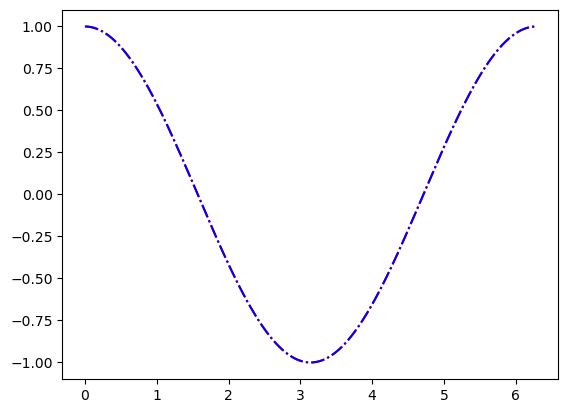

In [69]:
print(np.shape(theta[1:-1]), np.shape(z_calc))
import matplotlib.pyplot as plt
plt.figure()
plt.plot(theta[1:-1], z_calc, 'r-.')
plt.plot(theta, z_true, 'b-.')
plt.show

In [70]:
y = np.cos(theta)
t_true = -np.sin(theta)
t_calc = bruno.deriv1d(y, dtheta)

<function matplotlib.pyplot.show(close=None, block=None)>

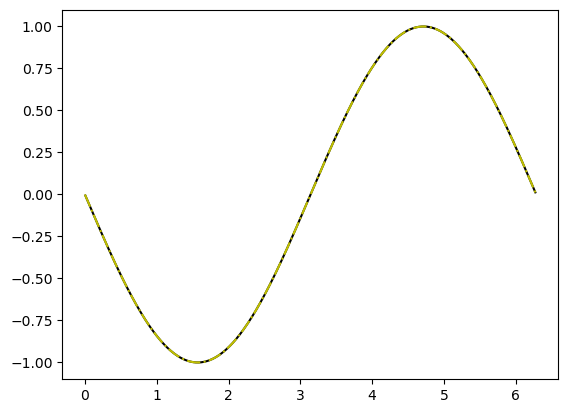

In [71]:
import matplotlib.pyplot as plt
plt.figure()
plt.plot(theta[1:-1], t_calc, 'k-')
plt.plot(theta, t_true, 'y-.')
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

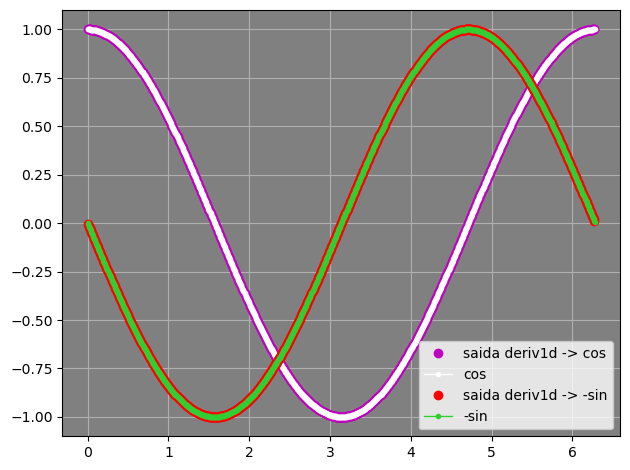

In [72]:
import matplotlib.pyplot as plt
plt.figure()
plt.plot(theta[1:-1:], z_calc, 'om', label = 'saida deriv1d -> cos', lw = 2)
plt.plot(theta, z_true, 'w.-', label = 'cos', lw = 1)
plt.plot(theta[1:-1], t_calc,'or', label = 'saida deriv1d -> -sin', lw = 2)
plt.plot(theta, t_true, color='#32CD32', marker='.', label = '-sin', lw = 1)
plt.legend()
plt.gca().set_facecolor('gray')
plt.tight_layout()
plt.grid()
plt.show

In [73]:
import numpy.testing as npt
# Teste da função deriv1d
def test_deriv1d():
    dtheta = 2. * np.pi / 1000
    theta = np.arange(0., 2. * np.pi, dtheta)
    y = np.sin(theta)
    z_true = np.cos(theta)
    
    # Cria a derivada com espaçamento dtheta
    z_calc = bruno.deriv1d(y, dtheta)
    
    # Compare com a derivada verdadeira
    # Compare com valores reais excluindo as bordas
    u = str(npt.assert_almost_equal(z_calc, z_true[1:len(z_true)-1], decimal=5, err_msg='Teste Faliu!')) #só vai até a 5ª casa decimal    
    
    if u == 'None':
        print("Teste passou com sucesso!")
    else:
        print('Teste faliu!')

# Run the test
test_deriv1d()

Teste passou com sucesso!


# Matriz - Matriz

In [74]:
import bruno
import numpy as np

def teste_matmat_real_entrada_diferente():
    try:
        A = np.array([[1, 2], [3, 4]])
        B = np.array([[1, 2, 3]])
        resultado = bruno.matmat_real_simple(A, B)
        print("teste_matmat_real_entrada_diferente falhou")
    except AssertionError:
        print("teste_matmat_real_entrada_diferente passou")

def teste_matmat_real_funcoes_comparar_numpy_dot():
    A = np.random.rand(3, 4)
    B = np.random.rand(4, 5)

    resultado_simples = bruno.matmat_real_simple(A, B)
    resultado_dot = np.dot(A, B)
    
    print(resultado_simples)
    print(resultado_dot)
    
    if np.allclose(resultado_simples, resultado_dot):
        print("teste_matmat_real_funcoes_comparar_numpy_dot passou")
    else:
        print("teste_matmat_real_funcoes_comparar_numpy_dot falhou")

def teste_matmat_real_funcoes_ignorar_complexo():
    A = np.array([[1, 2], [3, 4]])
    B = np.array([[5, 6], [7, 8]])
    resultado_simples = bruno.matmat_real_simple(A, B)
    resultado_dot = np.dot(A, B)
    
    print(resultado_simples)
    print(resultado_dot)
    
    if np.allclose(resultado_simples, resultado_dot):
        print("teste_matmat_real_funcoes_ignorar_complexo passou")
    else:
        print("teste_matmat_real_funcoes_ignorar_complexo falhou")

def teste_matmat_complexo_comparar_numpy_dot():
    A = np.random.rand(3, 4) + 1j * np.random.rand(3, 4)
    B = np.random.rand(4, 5) + 1j * np.random.rand(4, 5)

    resultado_complexo = bruno.matmat_complex(A, B)
    resultado_dot = np.dot(A, B)
    
    print(resultado_complexo)
    print(resultado_dot)
    
    if np.allclose(resultado_complexo, resultado_dot):
        print("teste_matmat_complexo_comparar_numpy_dot passou")
    else:
        print("teste_matmat_complexo_comparar_numpy_dot falhou")

def teste_matmat_complexo_funcao_invalida():
    try:
        A = np.array([[1 + 1j, 2 + 2j], [3 + 3j, 4 + 4j]])
        B = np.array([[5 + 5j, 6 + 6j], [7 + 7j, 8 + 8j]])
        # Fornece uma entrada inválida ao passar uma matriz não compatível
        C = np.array([[1 + 1j, 2 + 2j, 3 + 3j]])  # Dimensões incompatíveis para multiplicação
        resultado = bruno.matmat_complex(A, C)
        print(resultado)
        print("teste_matmat_complexo_funcao_invalida falhou")
    except AssertionError:
        print("teste_matmat_complexo_funcao_invalida passou")
    except Exception as e:
        print(f"teste_matmat_complexo_funcao_invalida falhou com exceção: {e}")

In [75]:
# Executar os testes
teste_matmat_real_entrada_diferente()
teste_matmat_real_funcoes_comparar_numpy_dot()
teste_matmat_real_funcoes_ignorar_complexo()
teste_matmat_complexo_comparar_numpy_dot()
teste_matmat_complexo_funcao_invalida()

teste_matmat_real_entrada_diferente passou
[[1.03218837 0.71754456 0.79128935 0.77550902 1.01901574]
 [0.72618188 0.6451605  0.47008327 0.77101135 0.63353444]
 [1.70834758 1.23700414 1.44375249 1.57802695 1.42647972]]
[[1.03218837 0.71754456 0.79128935 0.77550902 1.01901574]
 [0.72618188 0.6451605  0.47008327 0.77101135 0.63353444]
 [1.70834758 1.23700414 1.44375249 1.57802695 1.42647972]]
teste_matmat_real_funcoes_comparar_numpy_dot passou
[[19. 22.]
 [43. 50.]]
[[19 22]
 [43 50]]
teste_matmat_real_funcoes_ignorar_complexo passou
[[-0.32215174+1.61928297j  0.74305234+1.51283086j  0.75241707+1.51740706j
   0.80082061+1.90976707j  0.58333827+1.52810391j]
 [-0.56241238+2.09819001j  0.61823095+2.64460104j  0.34496426+2.45783803j
   0.21987917+2.48759118j  0.31022036+2.57953488j]
 [-0.97969863+1.92422578j -0.61482175+2.72582882j -1.0914545 +2.75090675j
  -0.42043459+2.11564169j -0.59121181+2.50577917j]]
[[-0.32215174+1.61928297j  0.74305234+1.51283086j  0.75241707+1.51740706j
   0.80082061

In [76]:
A = np.array([[7, 14], [21, 7]])
B = np.array([[3, 2], [2, 3]])
C = np.array([[7 +2j, 14-1j], [21+1j, 7-2j]])

In [77]:
A@C

array([[343.+28.j, 196.-35.j],
       [294.+49.j, 343.-35.j]])

In [78]:
bruno.matmat_complex(A, C)

array([[343.+28.j, 196.-35.j],
       [294.+49.j, 343.-35.j]])

In [79]:
A@B

array([[49, 56],
       [77, 63]])

In [80]:
bruno.matmat_real_dot(A, B)

array([[49., 56.],
       [77., 63.]])

In [81]:
bruno.matmat_real_simple(A, B)

array([[49., 56.],
       [77., 63.]])

In [82]:
bruno.matmat_real_outer(A, B)

array([[49., 56.],
       [77., 63.]])

In [83]:
bruno.matmat_real_matvec(A, B)

array([[49., 56.],
       [77., 63.]])

In [84]:
bruno.matmat_real_columns(A, B)

array([[49., 56.],
       [77., 63.]])

In [85]:
bruno.matmat_real_columns(A.real, C.real)

array([[343., 196.],
       [294., 343.]])

In [86]:
bruno.matmat_real_dot(A.real, C.real)

array([[343., 196.],
       [294., 343.]])

In [87]:
np.dot(A, B)

array([[49, 56],
       [77, 63]])

In [88]:
np.dot(A, C)

array([[343.+28.j, 196.-35.j],
       [294.+49.j, 343.-35.j]])

In [89]:
bruno.matmat_real_outer(A.real, C.real)

array([[343., 196.],
       [294., 343.]])

In [90]:
bruno.matmat_real_matvec(A.real, C.real)

array([[343., 196.],
       [294., 343.]])

In [91]:
bruno.matmat_real_simple(A.real, C.real)

array([[343., 196.],
       [294., 343.]])

## Ignorando a parte complexa

In [92]:
import numpy as np
from numpy.testing import assert_almost_equal as aae
import pytest
import bruno as br

def test_matmat_real_input_dont_match():
    'Fail when matrix dimensions don’t match for multiplication'
    A = np.ones((5, 4))
    B = np.ones((3, 6))  # Number of rows in B should match columns in A
    
    try:
        br.matmat_real_simple(A, B)
    except AssertionError as e:
        print(f'Error in matmat_real_simple: {e}')
    except ValueError as v:
        print(f'ValueError in matmat_real_simple: {v}')
    except TypeError as t:
        print(f'TypeError in matmat_real_simple: {t}')
    except Exception as ex:
        print(f'Unexpected error in matmat_real_simple: {ex}')
    
    try:
        br.matmat_real_dot(A, B)
    except AssertionError as e:
        print(f'Error in matmat_real_dot: {e}')
    except ValueError as v:
        print(f'ValueError in matmat_real_dot: {v}')
    except TypeError as t:
        print(f'TypeError in matmat_real_dot: {t}')
    except Exception as ex:
        print(f'Unexpected error in matmat_real_dot: {ex}')
    
    try:
        br.matmat_real_columns(A, B)
    except AssertionError as e:
        print(f'Error in matmat_real_columns: {e}')
    except ValueError as v:
        print(f'ValueError in matmat_real_columns: {v}')
    except TypeError as t:
        print(f'TypeError in matmat_real_columns: {t}')
    except Exception as ex:
        print(f'Unexpected error in matmat_real_columns: {ex}')


def test_matmat_real_functions_compare_numpy_dot():
    'Compare matmat_real_XXXX with numpy.dot'
    rng = np.random.default_rng(7777723111555799917665)
    matrix_A = rng.random((3, 4))
    matrix_B = rng.random((4, 5))
    
    output_simple = br.matmat_real_simple(matrix_A, matrix_B)
    output_dot = br.matmat_real_dot(matrix_A, matrix_B)
    output_columns = br.matmat_real_columns(matrix_A, matrix_B)
    output_numpy_dot = np.dot(matrix_A, matrix_B)
    
    try:
        aae(output_simple, output_numpy_dot, decimal=10)
        aae(output_dot, output_numpy_dot, decimal=10)
        aae(output_columns, output_numpy_dot, decimal=10)
    except AssertionError as e:
        print(f'AssertionError during comparison: {e}')
    except Exception as ex:
        print(f'Unexpected error during comparison: {ex}')


def test_matmat_real_functions_ignore_complex():
    'Complex part of input must be ignored'
    rng = np.random.default_rng(9999977777231115557999)
    matrix_real_A = rng.random((3, 4))
    matrix_imag_A = -0.3j * np.ones((3, 4))
    matrix_A = matrix_real_A + matrix_imag_A
    
    matrix_real_B = rng.random((4, 5))
    matrix_imag_B = 2j * np.ones((4, 5))
    matrix_B = matrix_real_B + matrix_imag_B
    
    output_simple = br.matmat_real_simple(matrix_A.real, matrix_B.real)
    output_dot = br.matmat_real_dot(matrix_A.real, matrix_B.real)
    output_columns = br.matmat_real_columns(matrix_A.real, matrix_B.real)
    output_reference = np.dot(matrix_real_A.real, matrix_real_B.real)
    
    try:
        aae(output_simple, output_reference, decimal=10)
        aae(output_dot, output_reference, decimal=10)
        aae(output_columns, output_reference, decimal=10)
    except AssertionError as e:
        print(f'AssertionError during comparison: {e}')
    except Exception as ex:
        print(f'Unexpected error during comparison: {ex}')


def test_matmat_complex_compare_numpy_dot():
    'Compare matmat_complex with numpy.dot'
    rng = np.random.default_rng(9999977777231115557999)
    matrix_real_A = rng.random((3, 4))
    matrix_imag_A = 1j * rng.random((3, 4))
    matrix_A = matrix_real_A + matrix_imag_A
    
    matrix_real_B = rng.random((4, 5))
    matrix_imag_B = 1j * rng.random((4, 5))
    matrix_B = matrix_real_B + matrix_imag_B
    
    output_simple = br.matmat_complex(matrix_A, matrix_B)
    output_dot = br.matmat_complex(matrix_A, matrix_B)
    output_columns = br.matmat_complex(matrix_A, matrix_B)
    output_numpy_dot = np.dot(matrix_A, matrix_B)
    
    try:
        print(
        np.allclose(output_simple, output_numpy_dot, rtol=10),
        np.allclose(output_dot, output_numpy_dot, rtol=10),
        np.allclose(output_columns, output_numpy_dot, rtol=10))
    except AssertionError as e:
        print(f'AssertionError during comparison: {e}')
    except Exception as ex:
        print(f'Unexpected error during comparison: {ex}')


def test_matmat_complex_invalid_function():
    'Must raise error for invalid function'
    A = np.ones((5, 4))
    B = np.ones((4, 6))
    
    try:
        br.matmat_complex(A, B, function='invalid-function')
    except AssertionError as e:
        print(f'Error in matmat_complex with invalid function: {e}')
    except ValueError as v:
        print(f'ValueError in matmat_complex with invalid function: {v}')
    except TypeError as t:
        print(f'TypeError in matmat_complex with invalid function: {t}')
    except AttributeError as t:
        print(f'Error: {t}')
    except Exception as ex:
        print(f'Unexpected error in matmat_complex with invalid function: {ex}')
    
    try:
        br.matmat_complex(A, B, function='column')
    except AssertionError as e:
        print(f'Error in matmat_complex with invalid function: {e}')
    except ValueError as v:
        print(f'ValueError in matmat_complex with invalid function: {v}')
    except TypeError as t:
        print(f'TypeError in matmat_complex with invalid function: {t}')
    except Exception as ex:
        print(f'Unexpected error in matmat_complex with invalid function: {ex}')
    
    try:
        br.matmat_complex(A, B, function='Dot')
    except AssertionError as e:
        print(f'Error in matmat_complex with invalid function: {e}')
    except ValueError as v:
        print(f'ValueError in matmat_complex with invalid function: {v}')
    except TypeError as t:
        print(f'TypeError in matmat_complex with invalid function: {t}')
    except Exception as ex:
        print(f'Unexpected error in matmat_complex with invalid function: {ex}')


In [93]:
test_matmat_real_input_dont_match()
test_matmat_real_functions_compare_numpy_dot()
test_matmat_real_functions_ignore_complex()
test_matmat_complex_compare_numpy_dot()
test_matmat_complex_invalid_function()

Error in matmat_real_simple: O número de colunas de A deve ser igual ao número de linhas de B
Error in matmat_real_dot: O número de colunas de A deve ser igual ao número de linhas de B
Error in matmat_real_columns: O número de colunas de A deve ser igual ao número de linhas de B
True True True
TypeError in matmat_complex with invalid function: matmat_complex() got an unexpected keyword argument 'function'
TypeError in matmat_complex with invalid function: matmat_complex() got an unexpected keyword argument 'function'
TypeError in matmat_complex with invalid function: matmat_complex() got an unexpected keyword argument 'function'


# Norma - Matrix

In [94]:
import bruno
import numpy as np

### Vamos testar as norma Frobenius, 2, 1  e $\infty$

In [95]:
A = np.array([[1, -2, 3], 
              [4, 0, -6], 
              [-7, 8, 9]])


In [96]:
print(bruno.mat_norm(A, norm_type='fro'))   # Norma de Frobenius

16.1245154965971


In [97]:
print(bruno.mat_norm(A, norm_type='1'))       # 1-norma

18


In [98]:
print(bruno.mat_norm(A, norm_type='2'))       # 2-norma

15.227543425917867


In [99]:
print(bruno.mat_norm(A, norm_type='inf'))   # Infinito-norma

24


##### Comparando com numpy norm

In [100]:
print(np.linalg.norm(A, ord='fro'))
print(np.linalg.norm(A, 1))
print(np.linalg.norm(A, 2))
print(np.linalg.norm(A, np.inf))

16.1245154965971
18.0
15.227543425917865
24.0


# Norma - Vector

In [101]:
m = np.array([1, 0, 7, 9, 1 , 6, 0, 4])

In [102]:
bruno.vec_norm(m, 0) # norma infinita

9.0

In [103]:
bruno.vec_norm(m, 1)

28.0

In [104]:
bruno.vec_norm(m, 2)

13.564659966250536

In [105]:
print(np.linalg.norm(m, ord=np.inf),
np.linalg.norm(m, ord=1),
np.linalg.norm(m, ord=2))

9.0 28.0 13.564659966250536


# Matrizes Triangulares

In [106]:
import numpy as np
import bruno as br  # Importando suas funções

def check_input_matrix_vector(matrix, x):
    """Verifica se a matriz é quadrada e se o vetor tem comprimento correto."""
    assert matrix.shape[0] == matrix.shape[1], "A matriz deve ser quadrada."
    assert isinstance(x, np.ndarray) and x.ndim == 1, "O vetor x deve ser 1D."
    assert matrix.shape[0] == len(x), "O comprimento do vetor deve ser igual ao tamanho da matriz."

def matvec_triu_prod3(U, x, check_input=True):
    '''
    Compute the product of an upper triangular matrix U 
    and a vector x. All elements are real numbers.
    
    Each element of the resultant vector is obtained by 
    computing a dot product.
    '''
    if check_input:
        assert U.shape[0] == U.shape[1], "Matrix must be square"
        assert x.ndim == 1, "x must be a 1D array"
        assert U.shape[0] == x.shape[0], "Matrix dimensions must match vector length"

    N = U.shape[0]
    y = np.zeros(N)
    
    for i in range(N):
        y[i] = br.dot_real(U[i, i:], x[i:])
    
    return y


def matvec_triu_prod5(U, x, check_input=True):
    '''
    Compute the product of an upper triangular matrix U 
    and a vector x. All elements are real numbers.
    
    The elements of the resultant vector are obtained by 
    computing successive scalar vector products.
    '''
    if check_input:
        assert U.shape[0] == U.shape[1], "Matrix must be square"
        assert x.ndim == 1, "x must be a 1D array"
        assert U.shape[0] == x.shape[0], "Matrix dimensions must match vector length"

    N = U.shape[0]
    y = np.zeros(N)
    
    for j in range(N):
        y[:j+1] += br.scalar_vec_real(x[j], U[:j+1, j])
    
    return y

def matvec_tril_prod8(L, x, check_input=True):
    '''
    Compute the product of a lower triangular matrix L 
    and a vector x. All elements are real numbers.
    
    Each element of the resultant vector is obtained by 
    computing a dot product between the current row of L 
    and the portion of x corresponding to the indices.

    Parameters
    ----------
    L : numpy array 2d
        Lower triangular matrix.
    x : numpy array 1d
        Vector that postmultiply the triangular matrix L.
    check_input : boolean
        If True, verify if the input is valid. Default is True.

    Returns
    -------
    result : numpy array 1d
        Vector obtained from the product L x.
    '''
    if check_input:
        assert L.shape[0] == L.shape[1], "Matrix must be square"
        assert x.ndim == 1, "x must be a 1D array"
        assert L.shape[0] == x.shape[0], "Matrix dimensions must match vector length"

    N = L.shape[0]
    z = np.zeros(N)
    
    for i in range(N):
        z[i] = br.dot_real(L[i, :i], x[:i])
    
    return z

def matvec_tril_prod10(L, x, check_input=True):
    '''
    Compute the product of a lower triangular matrix L 
    and a vector x. All elements are real numbers.
    
    The elements of the resultant vector are obtained 
    by computing successive scalar vector products.

    Parameters
    ----------
    L : numpy array 2d
        Lower triangular matrix.
    x : numpy array 1d
        Vector that postmultiply the triangular matrix L.
    check_input : boolean
        If True, verify if the input is valid. Default is True.

    Returns
    -------
    result : numpy array 1d
        Vector obtained from the product L x.
    '''
    if check_input:
        assert L.shape[0] == L.shape[1], "Matrix must be square"
        assert x.ndim == 1, "x must be a 1D array"
        assert L.shape[0] == x.shape[0], "Matrix dimensions must match vector length"

    N = L.shape[0]
    z = np.zeros(N)
    
    for j in range(N):
        z[j:] += br.scalar_vec_real(x[j], L[j:, j])
    
    return z


In [107]:
# Gera uma matriz triangular superior aleatória
def generate_upper_triangular_matrix(n, random_seed=None):
    np.random.seed(random_seed)
    matrix = np.random.rand(n, n)
    return np.triu(matrix)  # Retorna apenas os elementos da triangular superior

# Gera uma matriz triangular inferior aleatória
def generate_lower_triangular_matrix(n, random_seed=None):
    np.random.seed(random_seed)
    matrix = np.random.rand(n, n)
    return np.tril(matrix)  # Retorna apenas os elementos da triangular inferior

def generate_random_vector(n, random_seed=None):
    np.random.seed(random_seed)
    return np.random.rand(n)

In [108]:
U3 = generate_upper_triangular_matrix(3)
v3 = generate_random_vector(3)

In [109]:
matvec_triu_prod3(U3, v3)

array([0.82074689, 0.04384415, 0.28544562])

In [110]:
matvec_triu_prod5(U3, v3)

array([0.82074689, 0.04384415, 0.28544562])

In [111]:
L3 = generate_lower_triangular_matrix(3)

In [112]:
matvec_tril_prod8(L3, v3)

array([0.        , 0.15054094, 0.2861617 ])

In [113]:
matvec_tril_prod10(L3, v3)

array([0.49951701, 0.35484898, 0.29731027])

### Comparando Ux = v  ----> Triu_system ----> Triangular_superior

In [114]:
x= br.triangular_superior(U3, v3)
x

array([-2.47167515,  1.48993968,  1.88508788])

In [115]:
x1 = np.linalg.solve(U3, v3)
x1

array([-2.47167515,  1.48993968,  1.88508788])

### Comparando Lx = v -----> Tril_system -----> Triangular_inferior

In [116]:
x= br.triangular_inferior(L3, v3)
x

array([ 0.6240409 ,  0.06032592, 35.10288794])

In [117]:
x1 = np.linalg.solve(L3, v3)
x1

array([ 0.6240409 ,  0.06032592, 35.10288794])

# Eliminação de Gauss

In [118]:
import bruno
import numpy as np

In [119]:
A = np.array([[2.,1.,-1.],
              [-3.,-1.,2.],
              [-2.,1.,2.]])


y = np.array([8., -11., -3.])

In [120]:
u, b=bruno.Gauss_elim(A, y)
np.linalg.solve(u, b)

array([ 2.,  3., -1.])

In [121]:
t1 = np.linalg.solve(A, y)
t1

array([ 2.,  3., -1.])

In [122]:
t2 = bruno.triangular_superior(u, b)
t2

array([ 2.,  3., -1.])

In [123]:
print("True" if np.allclose(t1 ,t2 , rtol =1) else "False") # tolerancia de uma casa decimal

True


In [124]:
print(type(t1), type(t2))

<class 'numpy.ndarray'> <class 'numpy.ndarray'>


### N = 8 elementos

In [125]:
A = np.array([[4, 1, -2, 3, 0, 7, 2, 5],
              [2, 5, 0, -1, 4, 3, 6, -2],
              [0, 4, 3, 1, -5, 2, 7, 0],
              [1, 0, 5, 4, 2, 6, -3, 3],
              [3, 2, 6, 0, 5, -1, 4, 1],
              [-2, 1, 0, 3, 6, 4, 1, 2],
              [5, 4, -1, 2, 3, 0, 7, 6],
              [2, 6, 3, 5, -2, 1, 4, 0]], dtype=float)

x = np.array([10, -2, 8, 7, 5, -3, 4, 6], dtype=float)

In [126]:
U, b = bruno.Gauss_elim(A, x)

In [127]:
print(U)

[[ 4.00000000e+00  1.00000000e+00 -2.00000000e+00  3.00000000e+00
   0.00000000e+00  7.00000000e+00  2.00000000e+00  5.00000000e+00]
 [ 0.00000000e+00  4.50000000e+00  1.00000000e+00 -2.50000000e+00
   4.00000000e+00 -5.00000000e-01  5.00000000e+00 -4.50000000e+00]
 [ 0.00000000e+00  0.00000000e+00  2.11111111e+00  3.22222222e+00
  -8.55555556e+00  2.44444444e+00  2.55555556e+00  4.00000000e+00]
 [ 0.00000000e+00  0.00000000e+00  0.00000000e+00 -5.36842105e+00
   2.47368421e+01 -2.21052632e+00 -9.94736842e+00 -9.02631579e+00]
 [ 0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  -2.48039216e+01 -9.29411765e+00  1.56764706e+01  5.96568627e+00]
 [ 0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
   0.00000000e+00 -6.26956522e+00  9.28695652e+00  4.12608696e+00]
 [ 0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  -4.44089210e-16  0.00000000e+00 -1.00159501e+01 -2.31733073e+00]
 [ 0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  -

In [128]:
bruno.triangular_superior(U, b)

array([ 1.57343216, -2.33489651,  0.71631945,  1.51180125, -0.68578496,
        0.5187449 ,  1.31605884, -0.6649858 ])

In [129]:
np.linalg.solve(U, b)

array([ 1.57343216, -2.33489651,  0.71631945,  1.51180125, -0.68578496,
        0.5187449 ,  1.31605884, -0.6649858 ])

In [130]:
np.allclose(bruno.triangular_superior(U, b), np.linalg.solve(U, b), rtol=5 ) # tolerancia de 5 casas decimais

True

### Testando a matriz do exemplo de aula

In [131]:
A = np.array([[ 2., 1.,-1.],
              [-3.,-1., 2.],
              [-2., 1., 2.]])
y = np.array([8., -11., -3.])

### Testar a Função de Permutação:

In [132]:
ba1 = bruno.permut(A, 0)

In [133]:
I = np.identity(A.shape[0])
print('I = ', '\n', I, '\n')
P1 = I[[1,0,2]]
print('P1 = ', '\n', P1, '\n')
A1 = P1@A
print('A1 = ', '\n',A1, '\n')
#Tetando se as matrizes são parecidas
for r in range(0, len(y)):
    print(np.allclose(ba1[1][r][:], A1[r][:], rtol = 1e8))

I =  
 [[1. 0. 0.]
 [0. 1. 0.]
 [0. 0. 1.]] 

P1 =  
 [[0. 1. 0.]
 [1. 0. 0.]
 [0. 0. 1.]] 

A1 =  
 [[ 2.  1. -1.]
 [-3. -1.  2.]
 [-2.  1.  2.]] 

True
True
True


In [134]:
ba2 = bruno.permut(A, 1)
I = np.identity(A.shape[0])
print('I = ', '\n', I, '\n')
print('Perm 2 = ', '\n', ba2[1], '\n')
P2 = I[[0,2,1]]
print('P2 = ', '\n', P2, '\n')
A2 = P2@A
print('A2 = ', '\n',A2, '\n')
#Tetando se as matrizes são parecidas
for r in range(0, len(y)):
    print(np.allclose(ba2[1][r][:], A2[r][:], rtol = 1e8))

I =  
 [[1. 0. 0.]
 [0. 1. 0.]
 [0. 0. 1.]] 

Perm 2 =  
 [[-3. -1.  2.]
 [ 2.  1. -1.]
 [-2.  1.  2.]] 

P2 =  
 [[1. 0. 0.]
 [0. 0. 1.]
 [0. 1. 0.]] 

A2 =  
 [[-3. -1.  2.]
 [-2.  1.  2.]
 [ 2.  1. -1.]] 

True
True
True


In [135]:
ba3 = bruno.permut(A2, 1)
I = np.identity(A.shape[0])
print('I = ', '\n', I, '\n')
print('Perm 3 = ', '\n', ba3[1], '\n')
P3 = I[[1,2,0]]
print('P3 = ', '\n', P3, '\n')
A3 = P3@A
print('A3 = ', '\n',A3, '\n')
#Tetando se as matrizes são parecidas
for r in range(0, len(y)):
    print(np.allclose(ba3[1][r][:], A3[r][:], rtol = 1e8))

print('PP3 = ', '\n',I[ba3[0]], '\n')

I =  
 [[1. 0. 0.]
 [0. 1. 0.]
 [0. 0. 1.]] 

Perm 3 =  
 [[-3. -1.  2.]
 [-2.  1.  2.]
 [ 2.  1. -1.]] 

P3 =  
 [[0. 1. 0.]
 [0. 0. 1.]
 [1. 0. 0.]] 

A3 =  
 [[ 2.  1. -1.]
 [-2.  1.  2.]
 [-3. -1.  2.]] 

True
True
True
PP3 =  
 [0. 1. 0.] 



###### Verifica que a função permut não ficou muito parecido para esse exemplo de matriz $P_n[\vec{p}]$, uma vez que duas linhas delas são iguais em modulo, pois ele verifica o pivo maximo de cada linha. Indices diferente de zero, ele não permuta. 

### Crie um sistema linear e seu sistema triangular equivalente manualmente (sem usar Gauss_elim).

## Seja o sistema linear Ax = b, onde 
A =\begin{bmatrix}
2 & 1 & -1 & 2 \\
4 & 5 & -3 & 6 \\
-2 & 5 & -2 & 6 \\
4 & 11 & -4 & 8
\end{bmatrix} 
b = \begin{bmatrix}
0 \\
0 \\
1 \\
2
\end{bmatrix}
## O seu sistema trinangular equivalente é Ux = b_mod
U = \begin{bmatrix}
2 & 1 & -1 & 2 \\
0 & 3 & -1 & 2 \\
0 & 0 & -1 & 4 \\
0 & 0 & 0 & 2
\end{bmatrix}

b_mod = \begin{bmatrix}
0 \\
0 \\
1 \\
3
\end{bmatrix}

### Vamos Usar a função Gauss_elim para calcular o sistema triangular equivalente.

In [136]:
A =np.array([
[2 , 1 , -1 , 2],
[4 , 5 , -3 , 6],
[-2 , 5 , -2 , 6],
[4 , 11 , -4 , 8]])

B = np.array([0,0,1,2])

U_verdadeiro = np.array([
[ 2.,  1., -1.,  2.],
[ 0.,  3., -1.,  2.],
[ 0.,  0., -1.,  4.],
[ 0.,  0.,  0.,  2.]])

b_verdadeiro = np.array([0., 0., 1., 3.])

In [137]:
U, b_mod = bruno.Gauss_elim(A, B)

In [138]:
U

array([[ 2.,  1., -1.,  2.],
       [ 0.,  3., -1.,  2.],
       [ 0.,  0., -1.,  4.],
       [ 0.,  0.,  0.,  2.]])

In [139]:
b_mod

array([0., 0., 1., 3.])

In [140]:
bruno.triangular_superior(U, b_mod)

array([0.66666667, 0.66666667, 5.        , 1.5       ])

In [141]:
np.linalg.solve(A, B)

array([0.66666667, 0.66666667, 5.        , 1.5       ])

#### Comparando o calculado com o verdadeiro

In [142]:
np.allclose(U_verdadeiro, U)

True

In [143]:
np.allclose(b_verdadeiro, b_mod)

True

### Veficando assim, que o sistema calculado bate com o verdadeiro!

### Crie uma matriz $A_0$ e um vetor $\vec{x_0}$ e use-os para calcular um vetor $A_0\vec{x_0} = \vec{y_0}$. Então, use a função *Gauss_elim* para calcular o sistema triangular equivalente. Use uma de suas funções para calcular um vetor $\vec{x1}$ resolvendo o sistema triangular equivalente. Finalmente, compare o vetor calculado $\vec{x_1}$ e o vetor esperado $\vec{x_0}$.

In [144]:
A0 = np.array([
[2, 4, -2, 4], 
[1, 5, 5, 11],
[-1,-3,-2,-4] , 
[2, 6, 6, 8]])  

x0 = np.array([1,2,3,4])

y0 = bruno.matvec_real(A0, x0)

In [145]:
U, b_mod = bruno.Gauss_elim(A0, y0)

In [146]:
print('U:',U, '\t', 'b_mod: ', b_mod)

U: [[ 2.  4. -2.  4.]
 [ 0.  3.  6.  9.]
 [ 0.  0. -1.  1.]
 [ 0.  0.  0.  2.]] 	 b_mod:  [20. 60.  1.  8.]


In [147]:
x1 = bruno.triangular_superior(U, b_mod)

In [148]:
######### comparando X1 com X0 (vetor original)
print(np.allclose(x0, x1), ': x0 = x1')
print('x1: ', x1)

True : x0 = x1
x1:  [1. 2. 3. 4.]


In [149]:
y = bruno.matvec_real(A, x0)

In [150]:
U, b, L = bruno.Gauss_elim(A0, y, Mat_L=True)

In [151]:
bruno.triangular_superior(U, b)

array([ 583.83333333, -352.83333333,   49.        ,   87.66666667])

In [152]:
b

array([  9.        ,  24.5       ,  38.66666667, 175.33333333])

In [153]:
U

array([[ 2.,  4., -2.,  4.],
       [ 0.,  3.,  6.,  9.],
       [ 0.,  0., -1.,  1.],
       [ 0.,  0.,  0.,  2.]])

In [154]:
print(L)

[[ 1.          0.          0.          0.        ]
 [ 0.5         1.          0.          0.        ]
 [-0.5        -0.33333333  1.          0.        ]
 [ 1.          0.66666667 -4.          1.        ]]


In [155]:
np.linalg.solve(A, y)

array([1., 2., 3., 4.])

In [156]:
x = bruno.triangular_inferior(L, y)
x

array([  9.        ,  24.5       ,  38.66666667, 175.33333333])

In [157]:
bruno.triangular_superior(U, x)

array([ 583.83333333, -352.83333333,   49.        ,   87.66666667])

In [158]:
L@U

array([[ 2.,  4., -2.,  4.],
       [ 1.,  5.,  5., 11.],
       [-1., -3., -2., -4.],
       [ 2.,  6.,  6.,  8.]])

### Tentando fazer por pivotamento (Troca de linhas).

In [159]:
def permut(C, i):
    """
    Função de permutação para realizar a troca de linhas, garantindo que o pivô seja o maior valor absoluto.
    
    Parâmetros:
    -----------
    C : numpy.ndarray
        Matriz aumentada (A e y empilhados).
    
    i : int
        Índice atual do passo da eliminação.
    
    Retorna:
    --------
    p : list
        Vetor de permutação.
    
    C : numpy.ndarray
        Matriz C com as linhas permutadas.
    """
    # Vetor de índices de permutação
    p = [j for j in range(C.shape[0])]
    
    # Encontra o índice do maior valor absoluto na coluna i a partir da linha i
    imax = i + np.argmax(np.abs(C[i:, i]))
    
    # Se o maior valor não estiver na linha atual, troca as linhas
    if imax != i:
        p[i], p[imax] = p[imax], p[i]
    
    # Retorna o vetor de permutação e a matriz permutada
    return p, C[p, :]

def Gauss_elim(A, y, check_input=True):
    """
    Executa a eliminação Gaussiana com pivotamento parcial para resolver o sistema Ax = y.
    
    Parâmetros:
    -----------
    A : numpy.ndarray
        Matriz quadrada do sistema linear.
    
    y : numpy.ndarray
        Vetor independente do sistema linear.
    
    check_input : boolean, opcional
        Se True, verifica se as entradas são válidas. O padrão é True.
    
    Retorna:
    --------
    Uper : numpy.ndarray
        Matriz triangular superior do sistema equivalente.
    
    b_mod : numpy.ndarray
        Vetor independente modificado após a eliminação.
    """
    N = A.shape[0]  # Número de linhas/colunas da matriz A
    
    if check_input is True:
        assert A.ndim == 2, 'A deve ser uma matriz'
        assert y.ndim == 1, 'y deve ser um vetor'
        assert A.shape[1] == N, 'A deve ser quadrada'
        assert y.size == N, 'O tamanho de y deve ser igual ao número de colunas de A'
    
    # Cria a matriz C empilhando A e y como uma matriz aumentada
    C = np.hstack((A, y.reshape(-1, 1)))

    for k in range(N - 1):
        # Passo de permutação para garantir que o maior pivô esteja na linha atual
        p, C = permut(C, k)
        
        # Verifica se o pivô não é zero
        assert C[k, k] != 0., 'Pivô nulo encontrado!'
        
        # Calcula os multiplicadores de Gauss e armazena na parte inferior da coluna
        C[k + 1:, k] = C[k + 1:, k] / C[k, k]
        
        # Zera os elementos da coluna abaixo do pivô
        C[k+1:, k+1:] -=  np.outer(C[k + 1:, k], C[k, k + 1:])
    
    # Retorna a matriz triangular superior e o vetor independente modificado
    return C[:, :N], C[:, N]

In [160]:
U, b = Gauss_elim(A, y)

In [161]:
U

array([[ 4.        ,  5.        , -3.        ,  6.        ],
       [-0.5       ,  7.5       , -3.5       ,  9.        ],
       [ 1.        ,  0.8       ,  1.8       , -5.2       ],
       [ 0.5       , -0.2       , -0.11111111,  0.22222222]])

In [162]:
b

array([ 29.        ,  40.5       , -15.4       ,   0.88888889])

##### Vemos um erro na solução, pois o U n é um triangular superior

In [163]:
def Gauss_elim(A, x, check_input=True, low=False):
    """
    Executa a eliminação Gaussiana em uma matriz quadrada A e vetor x para resolver o sistema linear Ax = b.
    
    Parâmetros:
    -----------
    A : np.ndarray
        Matriz quadrada 2D (NxN) representando os coeficientes do sistema linear.
        
    x : np.ndarray
        Vetor 1D (N) representando o vetor do lado direito do sistema Ax = b.
        
    check_input : bool, opcional
        Se True, verifica se as entradas são válidas, incluindo a verificação de que A é uma matriz 2D 
        e x é um vetor 1D, além de garantir que ambos contenham apenas números reais. 
        O padrão é True.
    
    Retornos:
    ---------
    Uper : np.ndarray
        Matriz 2D (NxN) resultante da eliminação Gaussiana, onde Uper é a matriz triangular superior.
    
    b : np.ndarray
        Vetor 1D (N) modificado correspondente ao vetor do lado direito após a eliminação Gaussiana.
    
    L : np.ndarray, opcional
        Matriz 2D (NxN) resultante dos multiplicadores de Gauss, onde L é a matriz triangular inferior.
    """
    N = A.shape[0]  # Número de linhas
    Uper = np.copy(A)
    b = np.copy(x)
    I = np.identity(N)
    L = np.identity(N)  # L inicia como identidade
    P = np.identity(N)
    
    if check_input:
        assert isinstance(A, np.ndarray) and A.ndim == 2, 'A deve ser uma matriz 2D'
        assert isinstance(x, np.ndarray) and b.ndim == 1, 'x deve ser um vetor 1D'
        # Verifica se A e b contêm apenas números reais
        assert np.isrealobj(A), 'A deve conter apenas números reais'
        assert np.isrealobj(x), 'x deve conter apenas números reais'

    for k in range(N - 1):
        # Criação do vetor u_k
        u_k = np.zeros(N)
        u_k[k] = 1
        
        # Pivotamento
        p, Uper = permut(Uper, k)
        b = b[p]  # Reordena o vetor b de acordo com a permutação
        P = P[p, :]  # Acumula a permutação na matriz P
        
        assert Uper[k, k] != 0., 'Pivô nulo encontrado!'
        
        # Criação do vetor t_k
        t_k = np.zeros(N)
        for i in range(k + 1, N):
            t_k[i] = Uper[i, k] / Uper[k, k]

        # Calcula a matriz M e faz a atualização
        M = bruno.outer_real(t_k, u_k)
        Uper = bruno.matmat_real_dot(I - M, Uper)
        b = bruno.matvec_real_simple(I - M, b)

        # Acumula as operações de eliminação para construir a matriz L
        L = bruno.matmat_real_dot(L, I + M)

    if low == False:
        return Uper, b, P
    else:
        return Uper, b, P, L, p

In [164]:
U, b, P, L, p= Gauss_elim(A0, y0, low=True)

In [165]:
U

array([[ 2. ,  4. , -2. ,  4. ],
       [ 0. ,  3. ,  6. ,  9. ],
       [ 0. ,  0. ,  4. , -2. ],
       [ 0. ,  0. ,  0. ,  0.5]])

In [166]:
L

array([[ 1.        ,  0.        ,  0.        ,  0.        ],
       [ 0.5       ,  1.        ,  0.        ,  0.        ],
       [-0.5       , -0.33333333,  1.        ,  0.        ],
       [ 1.        ,  0.66666667, -0.25      ,  1.        ]])

#### Para o sistema $$Ax =b $$ onde P é uma matriz de permutação $$PA = LU $$ e assim $LUx = Pb$

In [167]:
P@A == L@U

array([[ True, False, False, False],
       [False,  True, False, False],
       [False, False, False, False],
       [False, False, False, False]])

In [168]:
P

array([[1., 0., 0., 0.],
       [0., 1., 0., 0.],
       [0., 0., 0., 1.],
       [0., 0., 1., 0.]])

In [169]:
P_novo = np.identity(A.shape[0])
P_novo = P_novo[[0,1,3, 2]]
P_novo

array([[1., 0., 0., 0.],
       [0., 1., 0., 0.],
       [0., 0., 0., 1.],
       [0., 0., 1., 0.]])

In [170]:
P_novo@A 

array([[ 2.,  1., -1.,  2.],
       [ 4.,  5., -3.,  6.],
       [ 4., 11., -4.,  8.],
       [-2.,  5., -2.,  6.]])

In [171]:
A 

array([[ 2,  1, -1,  2],
       [ 4,  5, -3,  6],
       [-2,  5, -2,  6],
       [ 4, 11, -4,  8]])

In [172]:
L@U

array([[ 2.,  4., -2.,  4.],
       [ 1.,  5.,  5., 11.],
       [-1., -3.,  3., -7.],
       [ 2.,  6.,  1., 11.]])

In [173]:
P_novo = P_novo[[0,1,2, 3]]
P_novo

array([[1., 0., 0., 0.],
       [0., 1., 0., 0.],
       [0., 0., 0., 1.],
       [0., 0., 1., 0.]])

In [174]:
P_novo.T@A == L@U

array([[ True, False, False, False],
       [False,  True, False, False],
       [False, False, False, False],
       [False, False, False, False]])

In [175]:
########################

In [176]:
U, b, P, L,p = Gauss_elim(A, y0,low=True)

In [177]:
U

array([[ 4.        ,  5.        , -3.        ,  6.        ],
       [ 0.        ,  7.5       , -3.5       ,  9.        ],
       [ 0.        ,  0.        ,  1.8       , -5.2       ],
       [ 0.        ,  0.        ,  0.        ,  0.22222222]])

In [178]:
L

array([[ 1.        ,  0.        ,  0.        ,  0.        ],
       [ 0.5       ,  1.        ,  0.        ,  0.        ],
       [-0.5       , -0.2       ,  1.        ,  0.        ],
       [ 1.        ,  0.8       , -0.11111111,  1.        ]])

In [179]:
bruno.triangular_inferior(L, y0) == b[p]

array([False, False, False, False])

In [180]:
bruno.triangular_superior(U, bruno.triangular_inferior(L, y0))

array([-16. ,   3. , -66. , -21.5])

In [181]:
A[p] == L@U

array([[False, False, False, False],
       [False, False, False, False],
       [False, False, False, False],
       [False, False, False, False]])

In [182]:
bruno.triangular_inferior(L, y0)

array([20.        , 60.        , -7.        , -4.77777778])

In [183]:
b[p]

array([ 70. ,   6. , -15. , -10.8])

In [184]:
np.round(bruno.triangular_inferior(L, y0), 0) == b[p]

array([False, False, False, False])

In [185]:
np.round(bruno.triangular_inferior(L, y0), 0)

array([20., 60., -7., -5.])

## Decomposição LU

In [186]:
import bruno
import numpy as np

In [187]:
A = np.array([[5, 15, 40, 5],
            [20, 10, 30, 15],
            [1, 5, 3, 9],
            [3, 15, 40, 20]])
d = np.array([1,0,5,3])

In [188]:
C = bruno.lu_decomp(A, d)

In [189]:
x = bruno.lu_solve(C, d )

In [190]:
A@x

array([ 1.00000000e+00, -3.55271368e-15,  5.00000000e+00,  3.00000000e+00])

In [191]:
np.allclose(d, A@x, rtol = 10) # tolerancia de 10 casa deciamis

True

In [192]:
print('d: ', d, ' & ', np.round(A@x))

d:  [1 0 5 3]  &  [ 1. -0.  5.  3.]


#### Verificando se A = LU 

In [193]:
A_calc = bruno.matmat_real_dot(C[0], C[1]) # C[0] = L, C[1]  = U
A_calc

array([[ 5., 15., 40.,  5.],
       [20., 10., 30., 15.],
       [ 1.,  5.,  3.,  9.],
       [ 3., 15., 40., 20.]])

In [194]:
np.allclose(A_calc, A, rtol = 20) # Tolerancia de 20 casa decimais

True

#### Comparando a solução do sistema linear obtido através de  lu_solve com o  numpy.linalg.solve

In [195]:
np.allclose(np.linalg.solve(A, d), x) #tolerancia 1e8

True

In [196]:
print('x_numpy:', np.linalg.solve(A, d), ' & ', 'x_calculado:', x)

x_numpy: [-0.05633803  1.         -0.35868545  0.1258216 ]  &  x_calculado: [-0.05633803  1.         -0.35868545  0.1258216 ]


### usando um exemplo randomico 

In [197]:
# Define o tamanho da matriz
n = 4

# Gera uma matriz quadrada nxn com elementos inteiros aleatórios entre -10 e 10
B = np.random.randint(-10, 11, size=(n, n))

# Gera um vetor coluna nx1 com elementos inteiros aleatórios entre -10 e 10
f = np.random.randint(-10, 11, size=n)

In [198]:
z = bruno.lu_decomp(B, f)
w = bruno.lu_solve(z, f)
w

array([-2.04477612,  0.56467662, -1.54228856,  0.57960199])

In [199]:
f

array([-8, -3,  7, -6])

In [200]:
B

array([[ -3, -10,   4,  -4],
       [ -7,  -3,   9,  -3],
       [  5,   9,  -9,  -3],
       [  4,  10,   3,   2]])

In [201]:
np.linalg.solve(B, f)

array([-2.04477612,  0.56467662, -1.54228856,  0.57960199])

In [202]:
B@w

array([-8., -3.,  7., -6.])

### Definindo A0, x0, onde y0 = A0x0

In [203]:
# Definindo a matriz A0 e o vetor x0
A0 = np.array([[4, 3, 0, 0],
               [3, 4, -1, 0],
               [0, -1, 4, 3],
               [0, 0, 3, 4]])

x0 = np.array([1, 2, 3, 4])

# Calculando o vetor y0
y0 = bruno.matvec_dot(A0, x0)

# Usando a função lu_decomp para obter L e U
C = bruno.lu_decomp(A0, y0)

# Usando a função lu_solve para resolver o sistema LUx = y0
x1 = bruno.lu_solve(C, y0)

# Comparando o vetor x1 com o vetor esperado x0
print("Vetor original x0:", x0)
print("Vetor calculado x1:", x1)

# Verificando se x0 e x1 são iguais dentro de uma tolerância
tolerancia = 1e-9
np.allclose(x0, x1, atol=tolerancia)

Vetor original x0: [1 2 3 4]
Vetor calculado x1: [1. 2. 3. 4.]


True

# Test função de decomposição LU

In [204]:
import bruno 
import numpy as np

In [205]:
from bruno import lu_decomp_pivoting
from bruno import lu_solve_pivoting

## Nesse momento vamos fazer a decomposição A = LU 

In [206]:
A = np.array([[2., 1., 1.],
              [4., -6., 0.],
              [-2., 7., 2.]])

P, L, U = lu_decomp_pivoting(A, retornaLU=True)

In [207]:
L

array([[ 1. ,  0. ,  0. ],
       [ 0.5,  1. ,  0. ],
       [-0.5,  1. ,  1. ]])

In [208]:
U

array([[ 4., -6.,  0.],
       [ 0.,  4.,  1.],
       [ 0.,  0.,  1.]])

In [209]:
np.allclose(A[P], L@U)

True

## Vamos definir um vetor qualquer que satisfaça a solução

In [210]:
Vec = np.array([16, 8, 2])

In [211]:
P, C = lu_decomp_pivoting(A)

In [212]:
r = lu_solve_pivoting(P = P, C= C, y = Vec)
r

array([ 8.75,  4.5 , -6.  ])

In [213]:
np.linalg.solve(A, Vec)

array([ 8.75,  4.5 , -6.  ])

### Sistema Ar = vec

In [214]:
bruno.matvec_dot(A, r)

array([16.,  8.,  2.])

In [215]:
np.allclose(Vec, A@r)

True

In [216]:
# Obter I[P] a partir da lista de permutações P
I = np.eye(A.shape[0])
I_P_custom = I[P]
I_P_custom

array([[0., 1., 0.],
       [1., 0., 0.],
       [0., 0., 1.]])

In [217]:
from scipy.linalg import lu
# Decomposição LU com scipy
P_scipy, L_scipy, U_scipy = lu(A)

In [218]:
P_scipy.T

array([[0., 1., 0.],
       [1., 0., 0.],
       [0., 0., 1.]])

In [219]:
np.allclose(I_P_custom, P_scipy.T)

True

### continuando 

In [220]:
# Definir a matriz A0 e o vetor x0
A0 = np.array([[3., 1., 2.],
               [6., 3., 4.],
               [3., 1., 5.]])

x0 = np.array([4., 2., 3.])

# Calcular o vetor y0 como A0 * x0
y0 = bruno.matvec_dot(A0 , x0)
y0

array([20., 42., 29.])

In [221]:
P1, C1 = lu_decomp_pivoting(A0)

In [222]:
x1 = lu_solve_pivoting(P=P1, C=C1, y=y0)
x1

array([4., 2., 3.])

In [223]:
diff = np.linalg.norm(x0 - x1)

In [224]:
diff

0.0

In [225]:
np.round(np.linalg.inv(A0)@A0, 16) # até a 15 casa é uma identidade

array([[ 1.e+00, -1.e-16, -1.e-16],
       [ 0.e+00,  1.e+00,  0.e+00],
       [-1.e-16,  0.e+00,  1.e+00]])

In [226]:
np.linalg.det(A0)

8.999999999999998

In [227]:
bruno.minimos_quadrados(A0, y0)

array([4., 2., 3.])

In [228]:
np.linalg.solve(A0, y0)

array([4., 2., 3.])

##### Esse sistema tem solução

# Cholesky

In [229]:
import numpy as np
import bruno as br

## Teste 1

In [230]:
# Definir uma matriz simétrica positiva definida
A = np.array([[4, 2, 2],
              [2, 3, 1],
              [2, 1, 2]])

In [231]:
# Calcular a decomposição de Cholesky
CH = br.cho_decomp(A)

In [232]:
CH

array([[2.        , 0.        , 0.        ],
       [1.        , 1.41421356, 0.        ],
       [1.        , 0.        , 1.        ]])

In [233]:
D = br.matmat_real_outer(CH, CH.T)

In [234]:
D

array([[4., 2., 2.],
       [2., 3., 1.],
       [2., 1., 2.]])

In [235]:
np.allclose(A, D)

True

In [236]:
# Definindo um vetor x
x = np.array([9, 1, 1])
y = br.matvec_real_simple(A, x)
y

array([40., 22., 21.])

In [237]:
w = br.matvec_dot(np.linalg.inv(CH), y)
w

array([20.        ,  1.41421356,  1.        ])

In [238]:
x1 = br.matvec_dot(np.linalg.inv(CH.T), w)
x1

array([9., 1., 1.])

## Teste 2

In [239]:
# Define uma matriz simétrica e positiva definida
A = np.array([[4, 2, 2],
              [2, 2, 1],
              [2, 1, 2]])

# Faz uma cópia da matriz A para testar
A1 = A.copy()

# Calcula a decomposição de Cholesky
G = br.cho_decomp_overwrite(A1)

# Verifica se A = G @ G.T
u = br.matmat_real_outer(G, G.T)
np.allclose(u, A)

True

In [240]:
u

array([[4., 2., 2.],
       [2., 2., 1.],
       [2., 1., 2.]])

In [241]:
A

array([[4, 2, 2],
       [2, 2, 1],
       [2, 1, 2]])

In [242]:
# Define um vetor x
x = np.array([1, 2, 3])

# Calcula o vetor y = A @ x
y = A @ x

# Faz uma cópia da matriz A para testar
A1 = A.copy()

# Calcula a decomposição de Cholesky
G = br.cho_decomp_overwrite(A1)

# Resolve o sistema triangular inferior G @ z = y
z = br.triangular_inferior(G, y)

# Resolve o sistema triangular superior G.T @ x1 = z
x1 = br.triangular_superior(G.T, z)

In [243]:
G

array([[2, 0, 0],
       [1, 1, 0],
       [1, 0, 1]])

In [244]:
x1

array([1., 2., 3.])

In [245]:
np.linalg.cholesky(A)

array([[2., 0., 0.],
       [1., 1., 0.],
       [1., 0., 1.]])

## Teste 3

In [246]:
# Teste 1: Verificar se A * Ainv é a matriz identidade
A = np.array([[4, 12, -16], 
              [12, 37, -43], 
              [-16, -43, 98]])  # Matriz simétrica e positiva definida

# Calcular a decomposição de Cholesky de A
G = br.cho_decomp(A)

# Calcular a inversa de A usando a função cho_inverse
Ainv = br.cho_inverse(G)

# Verificar o produto A @ Ainv e Ainv @ A
identity_AAinv = br.matmat_real_dot(A, Ainv)
identity_AinvA = br.matmat_real_dot(Ainv, A)

In [247]:
np.allclose(identity_AAinv, identity_AinvA, rtol = 10)

True

In [248]:
Ainv

array([[ 49.36111111, -13.55555556,   2.11111111],
       [-13.55555556,   3.77777778,  -0.55555556],
       [  2.11111111,  -0.55555556,   0.11111111]])

In [249]:
np.linalg.inv(A)

array([[ 49.36111111, -13.55555556,   2.11111111],
       [-13.55555556,   3.77777778,  -0.55555556],
       [  2.11111111,  -0.55555556,   0.11111111]])

In [250]:
import bruno
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb

In [251]:
### inicianlizando os vetores X, Y
X = np.array([-1,0,1,2]).T
Y = np.array([1,-1,0,2]).T

<Axes: >

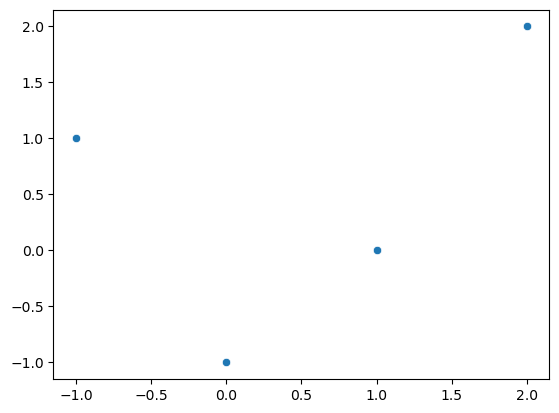

In [252]:
sb.scatterplot(x=X, y=Y)

### Calculando os minimos quadrados para um modelo de uma reta $y = \alpha x + \beta$

In [253]:
A = bruno.straight_line_matrix(X) # desenha a matriz de sensitividade
A

array([[-1,  1],
       [ 0,  1],
       [ 1,  1],
       [ 2,  1]])

In [254]:
p, incertezas = bruno.minimos_quadrados(A, Y, inc=True)

In [255]:
x_mod = np.linspace(int(np.min(X))-1, int(np.max(X))+1, 100)

In [256]:
y_mod = p[0]*x_mod + p[1]

<Axes: >

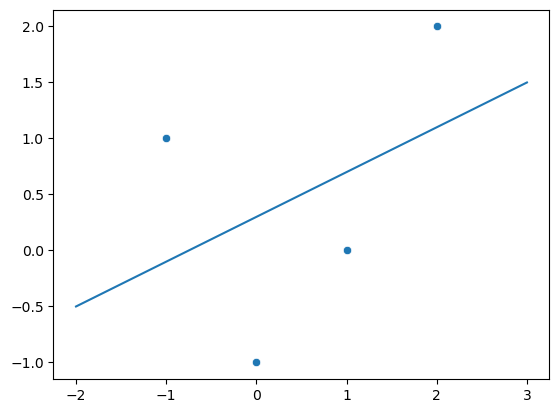

In [257]:
sb.scatterplot(x=X, y=Y)
sb.lineplot(x= x_mod, y =y_mod)

In [258]:
bruno.erro_padrao_e_intervalo(incertezas)[0]

array([0.74535599, 0.91287093])

#### Vamos tentar ajustar a uma parabola $\vec{p} = [a, b, c]$ e o modelo é $ax^2 + bx +c$

In [259]:
X2 = X**2

In [260]:
A2  = np.vstack([X2, A.T]).T

In [261]:
p2, inc2 = bruno.minimos_quadrados(A2, Y, inc=True)

In [262]:
y2  = p2[0]*x_mod**2 + p2[1]*x_mod + p2[2]

<Axes: >

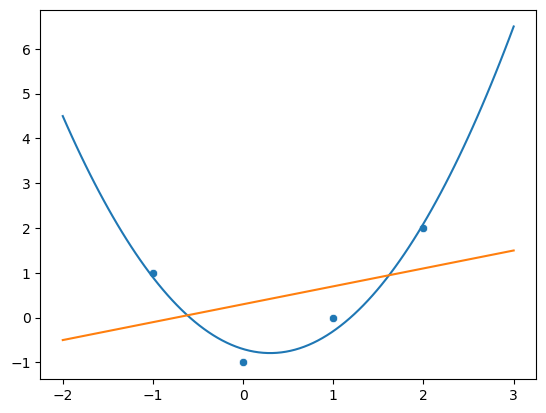

In [263]:
sb.scatterplot(x=X, y=Y)
sb.lineplot(x= x_mod, y =y2)
sb.lineplot(x= x_mod, y =y_mod)

In [264]:
err2 = bruno.erro_padrao_e_intervalo(inc2)[0]
err1 = bruno.erro_padrao_e_intervalo(incertezas)[0]

In [265]:
p2

array([ 1. , -0.6, -0.7])

In [266]:
bruno.residuo(A, x_min=p, d = Y)[1] # residuo de p [a, b] modelo da reta

2.04939015319192

In [267]:
bruno.residuo(A2, x_min=p2, d = Y)[1] #residuo de p [a, b, c] para o modelo da parabola

0.447213595499958

In [268]:
intervalo_de_confianca_parabola = bruno.erro_padrao_e_intervalo(inc2)[1]
intervalo_de_confianca_parabola

array([[-1.63333333,  1.63333333],
       [-2.19134662,  2.19134662],
       [-2.42262484,  2.42262484]])

In [269]:
err2 #erro padrao da parabola

array([0.83333333, 1.11803399, 1.23603308])

## Calculando o coeficiente de determinação da parábola

In [270]:
y_pred = p2[0]*X**2 + p2[1]*X + p2[2]

In [271]:
bruno.coeficiente_determinacao(Y, y_pred) # R2: 0,96 é um ótimo ajuste

0.96

In [272]:
# Podemos calcular o r2 da reta e ver quem mais se aproxima de 1
y0_pred = p[0]*X + p[1]
bruno.coeficiente_determinacao(Y, y0_pred) # R2: 0.16 é um péssimo ajuste

0.15999999999999992

## Resultando na parábola que melhor se ajusta com $R_2 = 0,96$

In [273]:
import numpy as np
import bruno

### Gerando valores de anomalia de gravidade mGal

In [274]:
N = 6 # numero de nós 
# valor de referencia de gravidade em mGal
g_ref = 978163.000
print(g_ref)

978163.0


In [275]:
# valores verdaeirs de gravidade em cada nó 
rng = np.random.default_rng(seed=78888880864342)
g_true = g_ref + 200.*rng.random(N)

for gi in g_true:
    print(gi)

# indices das estações gi e gj
# usado para calcular as gravidades diferentes
i = [0, 1, 2, 3, 2]
j = [1, 2, 5, 4, 3]

978177.9033183053
978194.2397607918
978207.5782130521
978247.6715835293
978362.1955659175
978273.5946933671


In [276]:
# verdadeira diferença de gravidade
l_true = g_true[j] - g_true[i]

for li in l_true:
    print(li)

16.336442486499436
13.33845226035919
66.016480315011
114.52398238820024
40.09337047720328


In [277]:
# valores verdadeirs de gravidade absoluta
g_abs_true = g_true[[0, 5]]

for gabs in g_abs_true:
    print(gabs)

978177.9033183053
978273.5946933671


In [278]:
# Variância dos dados de gravidade absoluta em (mGal)**2
var_g_abs = 0.008

# Variância dos dados de gravidade diferencial em (mGal)**2
var_l = 0.030

# dados de diferenças contaminados por ruído
noise_l = rng.normal(loc=0., scale=np.sqrt(var_l), size=l_true.size)
l = l_true + noise_l
l = np.round(l, decimals=3)

for li in l:
    print(li)
l

16.578
13.31
66.119
114.582
40.164


array([ 16.578,  13.31 ,  66.119, 114.582,  40.164])

In [279]:
# dados absolutos contaminados por ruído
noise_abs = rng.normal(loc=0., scale=np.sqrt(var_g_abs), size=g_abs_true.size)
g_abs = g_abs_true + noise_abs
g_abs = np.round(g_abs, decimals=3)
    
for gabsi in g_abs:
    print(gabsi)

978178.137
978273.521


In [280]:
#Create the w using the variances var_g_abs and var_l;
w = np.zeros(7)
for i in range(0, 7):
    if i >=0 and i<5:
        w[i] = var_l
    else:
        w[i] = var_g_abs

w

array([0.03 , 0.03 , 0.03 , 0.03 , 0.03 , 0.008, 0.008])

In [281]:
i = [0, 1, 2, 3, 2]
j = [1, 2, 5, 4, 3]

d = np.hstack([l, g_abs]).T # vetor calculado para L, g absoluto (0 e 5)
d

array([1.65780000e+01, 1.33100000e+01, 6.61190000e+01, 1.14582000e+02,
       4.01640000e+01, 9.78178137e+05, 9.78273521e+05])

In [282]:
# Criando matriz A de acordo com vetor l
A = np.zeros((7, N))
for k in range(5):
    A[k, i[k]] = -1
    A[k, j[k]] = 1
A

array([[-1.,  1.,  0.,  0.,  0.,  0.],
       [ 0., -1.,  1.,  0.,  0.,  0.],
       [ 0.,  0., -1.,  0.,  0.,  1.],
       [ 0.,  0.,  0., -1.,  1.,  0.],
       [ 0.,  0., -1.,  1.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  0.,  0.]])

In [283]:
g_hat, sigma_g, std = bruno.minimos_quadrados_ponderado(A, d, w, check_input=True, inc = True)

In [284]:
g_hat

array([-128., -128., -128.,  384.,  512.,  384.])

In [285]:
bruno.minimos_quadrados(A, d)

array([-128., -128., -128., -192., -128.,    0.])

In [286]:
A@g_hat

array([  0.,   0., 512., 128., 512.,   0.,   0.])

In [287]:
for s in range(0, len(sigma_g)):
    print(sigma_g[s])

[16777216. 16777216. 16777216.        0.        0.        0.]
[16777216. 16777216. 16777216.        0.        0.        0.]
[16777216. 16777216. 16777216.        0.        0.        0.]
[0. 0. 0. 0. 0. 0.]
[-12582912. -12582912. -12582912.         0.   8388608.  -4194304.]
[0. 0. 0. 0. 0. 0.]


In [288]:
std

array([4096.        , 4096.        , 4096.        ,    0.        ,
       2896.30937574,    0.        ])

## Ajuste de modelo linear SQ

In [289]:
import bruno as br
import numpy as np

In [290]:
d = np.random.normal(0, 10, 30)
y = np.random.normal(0, 15, 30)

In [291]:
y

array([-1.26086092e+01,  6.89143215e-03, -8.39997982e+00, -4.54494334e+00,
        4.54324173e+00, -2.07154854e+01, -1.06706763e+01, -4.31784188e+00,
        9.60416292e+00,  2.23408090e+00,  9.16766040e+00, -9.22035061e+00,
        2.16636881e+00,  1.36619511e+01, -6.25638779e+00, -3.88550790e+00,
        1.33776560e+00, -1.62490811e+01,  7.36328054e+00, -5.04079415e-02,
       -1.88589835e+01, -3.05419236e+01, -3.62925234e-01,  1.28715328e+01,
       -2.09494022e+00, -2.52745006e+00,  3.27618577e+01,  7.86724264e+00,
        2.80400844e+01, -1.89798822e-01])

In [292]:
print(d)

[-1.29728688e+00  6.96856068e+00  1.76378695e+01 -1.42504652e+01
 -1.06028420e-02  2.23513743e+01 -5.77210772e+00 -8.96012804e+00
 -1.73928567e+00  9.40293889e-03  9.50347865e-01  8.37660264e+00
 -8.22582384e+00  6.05158476e-01  7.44172737e+00  5.49798868e+00
  2.27627734e+01  7.03074390e+00  5.11206376e-01  6.55426831e+00
 -2.26461227e+00  6.00235377e+00  2.47197555e+00 -3.97471603e+00
  1.33960507e+01 -5.40683347e+00  4.87412694e+00  1.97176900e+01
 -8.72642221e+00 -5.80459753e+00]


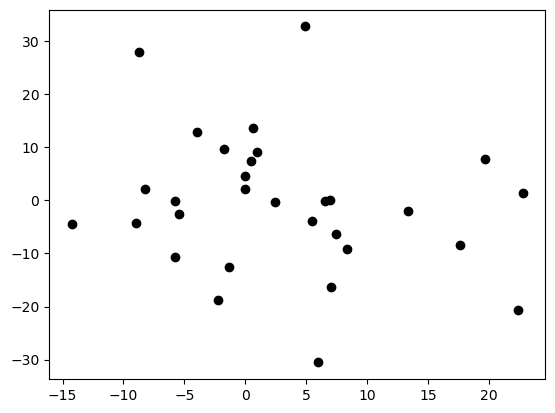

In [293]:
import matplotlib.pyplot as plt
s = np.array(d)
plt.plot(s, y, 'ok')
plt.show()

### Ajustando uma reta com o modelo y = $ \alpha$ x + $\beta$

In [294]:
one = np.ones(30)

In [295]:
A = np.vstack([d, one])

In [296]:
A = A.T

In [297]:
print(A)

[[-1.29728688e+00  1.00000000e+00]
 [ 6.96856068e+00  1.00000000e+00]
 [ 1.76378695e+01  1.00000000e+00]
 [-1.42504652e+01  1.00000000e+00]
 [-1.06028420e-02  1.00000000e+00]
 [ 2.23513743e+01  1.00000000e+00]
 [-5.77210772e+00  1.00000000e+00]
 [-8.96012804e+00  1.00000000e+00]
 [-1.73928567e+00  1.00000000e+00]
 [ 9.40293889e-03  1.00000000e+00]
 [ 9.50347865e-01  1.00000000e+00]
 [ 8.37660264e+00  1.00000000e+00]
 [-8.22582384e+00  1.00000000e+00]
 [ 6.05158476e-01  1.00000000e+00]
 [ 7.44172737e+00  1.00000000e+00]
 [ 5.49798868e+00  1.00000000e+00]
 [ 2.27627734e+01  1.00000000e+00]
 [ 7.03074390e+00  1.00000000e+00]
 [ 5.11206376e-01  1.00000000e+00]
 [ 6.55426831e+00  1.00000000e+00]
 [-2.26461227e+00  1.00000000e+00]
 [ 6.00235377e+00  1.00000000e+00]
 [ 2.47197555e+00  1.00000000e+00]
 [-3.97471603e+00  1.00000000e+00]
 [ 1.33960507e+01  1.00000000e+00]
 [-5.40683347e+00  1.00000000e+00]
 [ 4.87412694e+00  1.00000000e+00]
 [ 1.97176900e+01  1.00000000e+00]
 [-8.72642221e+00  1

In [298]:

p = br.minimos_quadrados(A, y)

In [299]:
print(p)

[-0.29349698  0.18616804]


In [300]:
f = np.linspace(-15, 30, 50)

In [301]:
model_line = p[0]*f + p[1]

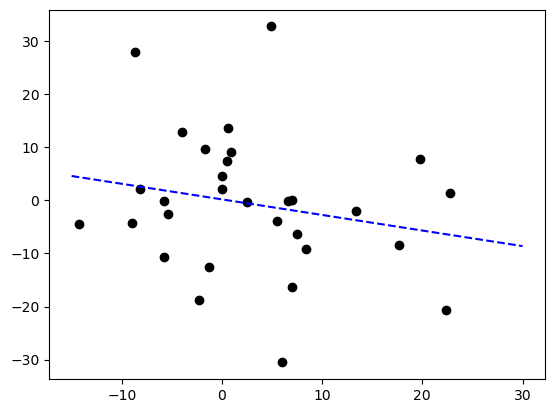

In [302]:
plt.plot(s, y, 'ok')
plt.plot(f, model_line, 'b--')
plt.show()

In [303]:
residuo, r2 = br.residuo(A, p, y)

In [304]:
import scipy as sc
sc.stats.tmean(np.array(residuo))

-4.144832625267251e-16

In [305]:
br.Estatisticas(residuo).variancia

166.11445321519247

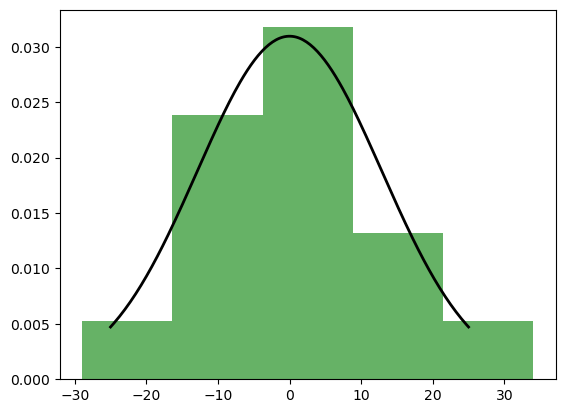

In [306]:
from scipy.stats import norm
media = br.Estatisticas(residuo).media
desvio_padrao = br.Estatisticas(residuo).desvio_padrao
x = np.linspace(-25, 25, 200)
p = norm.pdf(x, media, desvio_padrao)

#Plotar a curva gaussiana sobre o histograma

plt.hist(residuo, bins = 5, density=True, alpha=0.6, color='g')
plt.plot(x, p, 'k', linewidth=2)

## Matriz de Covariância

In [307]:
import bruno 
import numpy as np

In [308]:
# Defina a matriz H e o vetor v (supondo que v tenha N dimensões)

H = np.array([[2, 1, 0], [1, 3, 1], [0, 1, 4]])  # Exemplo de matriz H
v = np.array([1, 2, 3])  # Exemplo de vetor v
N = v.shape[0] # Exemplo para uma matriz 3x3
# Defina a matriz de covariância Σ_v (diagonal para elementos não correlacionados)
sigma_v = 1  # Variância de v
Sigma_v = sigma_v ** 2 * np.eye(N)   # Matriz de covariância diagonal

# Calcule Σ_t = H Σ_v H^T
Sigma_t = Sigma_v @ np.dot(H,  H.T)  # @ é a multiplicação de matrizes 

# Exibir a matriz de covariância Σ_t
print("Matriz de Covariância Σ_t:")
print(Sigma_t)
H@H.T

Matriz de Covariância Σ_t:
[[ 5.  5.  1.]
 [ 5. 11.  7.]
 [ 1.  7. 17.]]


array([[ 5,  5,  1],
       [ 5, 11,  7],
       [ 1,  7, 17]])

In [309]:
bruno.variancia(v)

1.0

In [310]:
np.cov(v)*np.eye(N)

array([[1., 0., 0.],
       [0., 1., 0.],
       [0., 0., 1.]])

In [311]:
bruno.mat_covariancia(H, v)

array([[ 5.,  5.,  1.],
       [ 5., 11.,  7.],
       [ 1.,  7., 17.]])

In [312]:
np.cov(v)*np.eye(N)@ np.dot(H, H.T)

array([[ 5.,  5.,  1.],
       [ 5., 11.,  7.],
       [ 1.,  7., 17.]])

##### Criando Problemas, de acordo com a questão 5 da Lista de Exercícios. Um classico problemas envolvendo tempo de transito e vagarosidades. (Raio sísimico)

In [313]:
import numpy as np
import matplotlib.pyplot as plt

# Função para calcular o erro residual
def residual_error(D, p, t):
    return np.linalg.norm(np.dot(D, p) - t)**2

# Gerando dados fictícios para D e t (os reais podem ser substituídos)
D = np.array([
    [1, 0, 0, 1, 1, 0, 0, 1, 0],
    [0, 0, 1, 0, 0, 1, 0, 0, 1]
])
t = np.array([2, 3])

# Solução de mínimos quadrados
DtD = np.dot(D.T, D)
Dtt = np.dot(D.T, t)
try:
    p_minimos_quadrados = np.linalg.solve(DtD, Dtt)
    # Intervalo de valores para variação dos parâmetros p
    p1_range = np.linspace(-2, 2, 100)
    p2_range = np.linspace(-2, 2, 100)

    # Inicializando a matriz de erro
    error_matrix = np.zeros((len(p1_range), len(p2_range)))

    # Calculando o erro para cada combinação de p1 e p2
    for i, p1 in enumerate(p1_range):
        for j, p2 in enumerate(p2_range):
            # Criando vetor de parâmetros p variando p1 e p2
            p = np.array([p1, 0, p2, p1, p1, p2, 0, p1, p2])
            error_matrix[i, j] = residual_error(D, p, t)

    # Gerando o gráfico de contorno
    plt.contourf(p1_range, p2_range, error_matrix, levels=50, cmap='viridis')
    plt.colorbar(label='Erro residual')

    # Encontrando o ponto onde o erro é mínimo
    min_idx = np.unravel_index(np.argmin(error_matrix), error_matrix.shape)
    min_p1 = p1_range[min_idx[0]]
    min_p2 = p2_range[min_idx[1]]

    # Plotando o ponto mínimo no gráfico (solução de mínimos quadrados)
    plt.plot(p_minimos_quadrados[0], p_minimos_quadrados[2], 'ro', label='Solução de Mínimos Quadrados')
    plt.xlabel('p1')
    plt.ylabel('p2')
    plt.title('Curvas de Contorno e Solução de Mínimos Quadrados')
    plt.legend()
    plt.show()
except ValueError as err:
    print('ValueError: ',err)




ValueError:  Singular matrix


## A matrix do problema anterior é uma matriz do tipo singular. Outra forma de resolver esse problema quando isso ocorre é Regularização de Tikhono

## $$p^{*} =(D^TD+λI)^{−1}\cdot D^T t$$

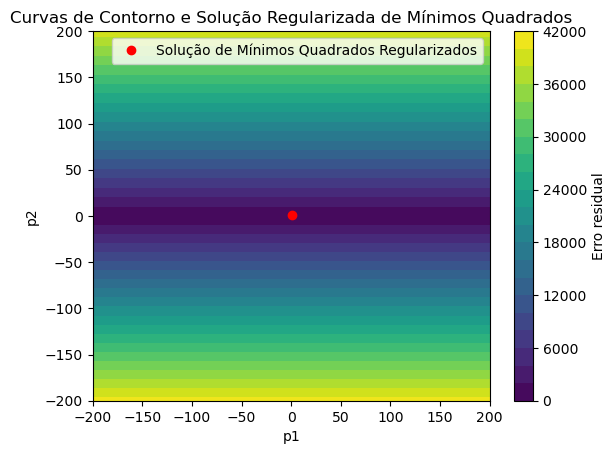

In [314]:
import numpy as np
import matplotlib.pyplot as plt

# Função para calcular o erro residual
def residual_error(D, p, t):
    return np.linalg.norm(np.dot(D, p) - t)**2

# Gerando dados fictícios para D e t (os reais podem ser substituídos)
D = np.array([
    [1, 0, 0, 1, 1, 0, 0, 1, 0],
    [0, 0, 1, 0, 0, 1, 0, 0, 1]
])
t = np.array([2, 3])

# Parâmetro de regularização
lambda_reg = 0.2

# Matriz identidade para a regularização
I = np.eye(D.shape[1])

# Solução de mínimos quadrados regularizados
DtD = np.dot(D.T, D)
Dtt = np.dot(D.T, t)
p_minimos_quadrados = np.linalg.solve(DtD + lambda_reg * I, Dtt)

# Intervalo de valores para variação dos parâmetros p
p1_range = np.linspace(-200, 200, 3)
p2_range = np.linspace(-200, 200, 3)

# Inicializando a matriz de erro
error_matrix = np.zeros((len(p1_range), len(p2_range)))

# Calculando o erro para cada combinação de p1 e p2
for i, p1 in enumerate(p1_range):
    for j, p2 in enumerate(p2_range):
        # Criando vetor de parâmetros p variando p1 e p2
        p = np.array([p1, p2, 0, 0, 0, 0, 0, 0, 0])
        error_matrix[i, j] = residual_error(D, p, t)

# Gerando o gráfico de contorno
plt.contourf(p1_range, p2_range, error_matrix, levels=20, cmap='viridis')
plt.colorbar(label='Erro residual')

# Plotando o ponto mínimo no gráfico (solução de mínimos quadrados)
plt.plot(p_minimos_quadrados[0], p_minimos_quadrados[2], 'ro', label='Solução de Mínimos Quadrados Regularizados')
plt.xlabel('p1')
plt.ylabel('p2')
plt.title('Curvas de Contorno e Solução Regularizada de Mínimos Quadrados')
plt.legend()
plt.show()


In [315]:
p_minimos_quadrados[0]

0.47619047619047616

In [316]:
p_minimos_quadrados[2]

0.9375

# DFT e IDFT fourrier

In [317]:
import bruno as br
import numpy as np

In [318]:
x = np.array([1, 2, 3, 4])

# Calcula a DFT
X = br.DFT(x)
print("DFT:", X)

# Calcula a IDFT
x_reconstruido = br.IDFT(X)
print("\nDFT:", x_reconstruido.real)

DFT: [10.+0.00000000e+00j -2.+2.00000000e+00j -2.-9.79717439e-16j
 -2.-2.00000000e+00j]

DFT: [1. 2. 3. 4.]


### funçoes teste

In [319]:
import numpy as np
from scipy.linalg import dft


In [320]:
br.DFT_matrix(3)@np.array([2,5,6])

array([13. +0.j       , -3.5+0.8660254j, -3.5-0.8660254j])

In [321]:
br.DFT(np.array([2,5,6]))

array([13. +0.j       , -3.5+0.8660254j, -3.5-0.8660254j])

In [322]:
br.IDFT_matrix(3)

array([[ 1. +0.j       ,  1. +0.j       ,  1. +0.j       ],
       [ 1. +0.j       , -0.5+0.8660254j, -0.5-0.8660254j],
       [ 1. +0.j       , -0.5-0.8660254j, -0.5+0.8660254j]])

In [323]:
br.IDFT(br.DFT(np.array([2,5,6]))).real

array([2., 5., 6.])

### Usar modelos rand de temperatura

In [324]:
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime, timedelta

Primeiros 10 dias e temperaturas:
Dia 1: 33.49°C
Dia 2: 31.46°C
Dia 3: 29.23°C
Dia 4: 30.29°C
Dia 5: 32.43°C
Dia 6: 36.17°C
Dia 7: 33.26°C
Dia 8: 32.05°C
Dia 9: 32.63°C
Dia 10: 31.56°C


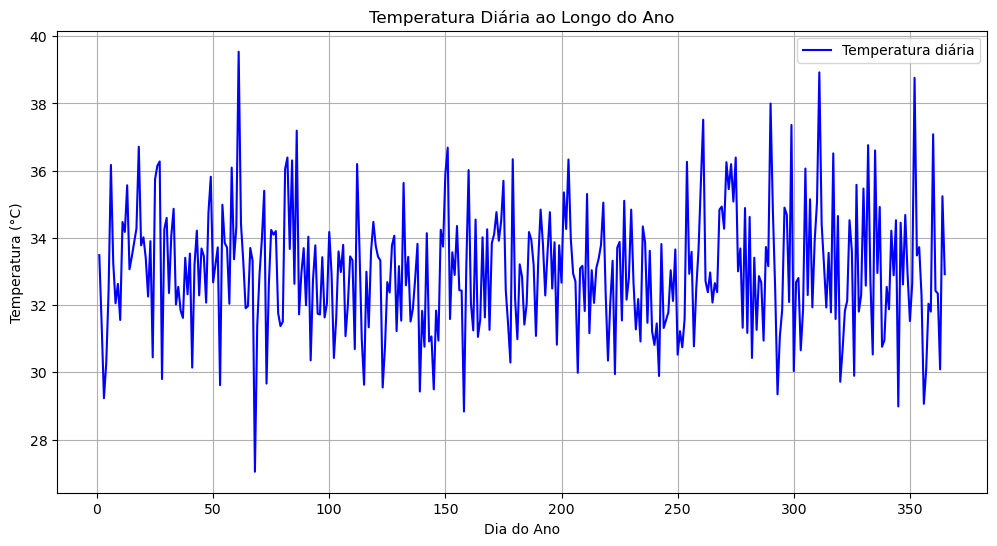

In [325]:
# Definindo os parâmetros
media_temperatura = 32.93  # Média anual
desvio_padrao = 2.0  # Desvio padrão para a variação das temperaturas
dias_ano = 365  # Número de dias no ano

# Gerando temperaturas aleatórias com distribuição normal
temperaturas = np.random.normal(loc=media_temperatura, scale=desvio_padrao, size=dias_ano)

# Criando um vetor de dias
dias = np.arange(1, dias_ano + 1)

# Exibindo os primeiros 10 valores como exemplo
print("Primeiros 10 dias e temperaturas:")
for dia, temp in zip(dias[:10], temperaturas[:10]):
    print(f"Dia {dia}: {temp:.2f}°C")

# Plotando as temperaturas
plt.figure(figsize=(12, 6))
plt.plot(dias, temperaturas, label='Temperatura diária', color='blue')
plt.xlabel('Dia do Ano')
plt.ylabel('Temperatura (°C)')
plt.title('Temperatura Diária ao Longo do Ano')
plt.legend()
plt.grid(True)
plt.show()

Primeiros 10 dias e temperaturas:
Dia 1: 25.29°C
Dia 2: 30.61°C
Dia 3: 30.16°C
Dia 4: 31.56°C
Dia 5: 30.92°C
Dia 6: 29.34°C
Dia 7: 30.77°C
Dia 8: 27.48°C
Dia 9: 27.30°C
Dia 10: 30.31°C


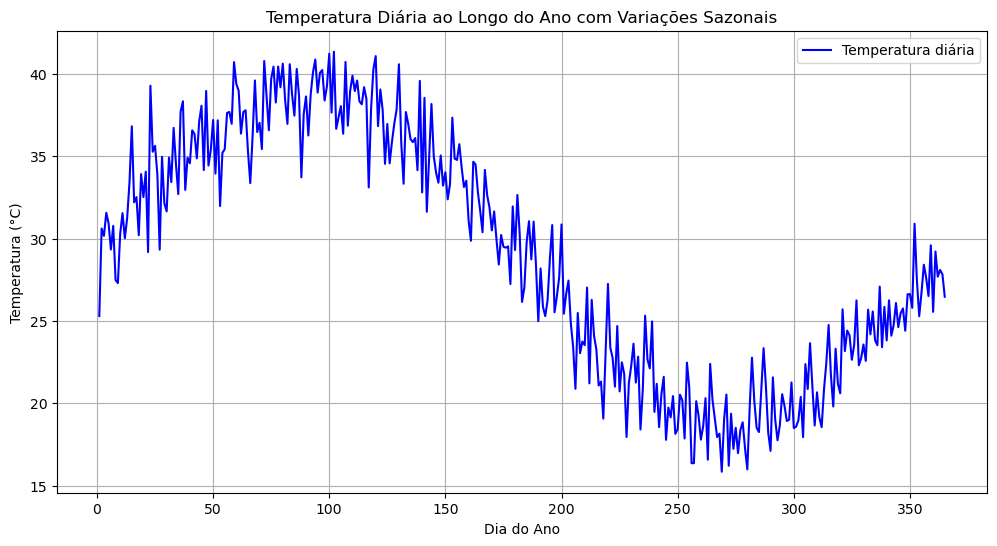

In [326]:
# Definindo os parâmetros
media_temperatura = 28.93  # Média anual
amplitude_variacao = 10.0  # Amplitude da variação sazonal
desvio_padrao = 2.0  # Desvio padrão para a variação das temperaturas aleatórias
dias_ano = 365  # Número de dias no ano

# Gerando o vetor de dias
dias = np.arange(1, dias_ano + 1)

# Criando uma função sazonal para representar as variações de temperatura ao longo do ano
# Assumindo um período de 365 dias para o ciclo anual
temperatura_sazonal = amplitude_variacao * np.sin(2 * np.pi * dias / dias_ano) + media_temperatura

# Adicionando variação aleatória à temperatura
temperaturas = temperatura_sazonal + np.random.normal(loc=0, scale=desvio_padrao, size=dias_ano)

# Exibindo os primeiros 10 valores como exemplo
print("Primeiros 10 dias e temperaturas:")
for dia, temp in zip(dias[:10], temperaturas[:10]):
    print(f"Dia {dia}: {temp:.2f}°C")

# Plotando as temperaturas
plt.figure(figsize=(12, 6))
plt.plot(dias, temperaturas, label='Temperatura diária', color='blue')
plt.xlabel('Dia do Ano')
plt.ylabel('Temperatura (°C)')
plt.title('Temperatura Diária ao Longo do Ano com Variações Sazonais')
plt.legend()
plt.grid(True)
plt.show()

## Vamos tentar fazer a transformada de Discreta de Fourier

In [327]:
freq = br.DFT(temperaturas)

/home/usuario/miniconda3/lib/python3.12/site-packages/matplotlib/cbook.py:1699: ComplexWarning: Casting complex values to real discards the imaginary part
  return math.isfinite(val)
/home/usuario/miniconda3/lib/python3.12/site-packages/matplotlib/cbook.py:1345: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


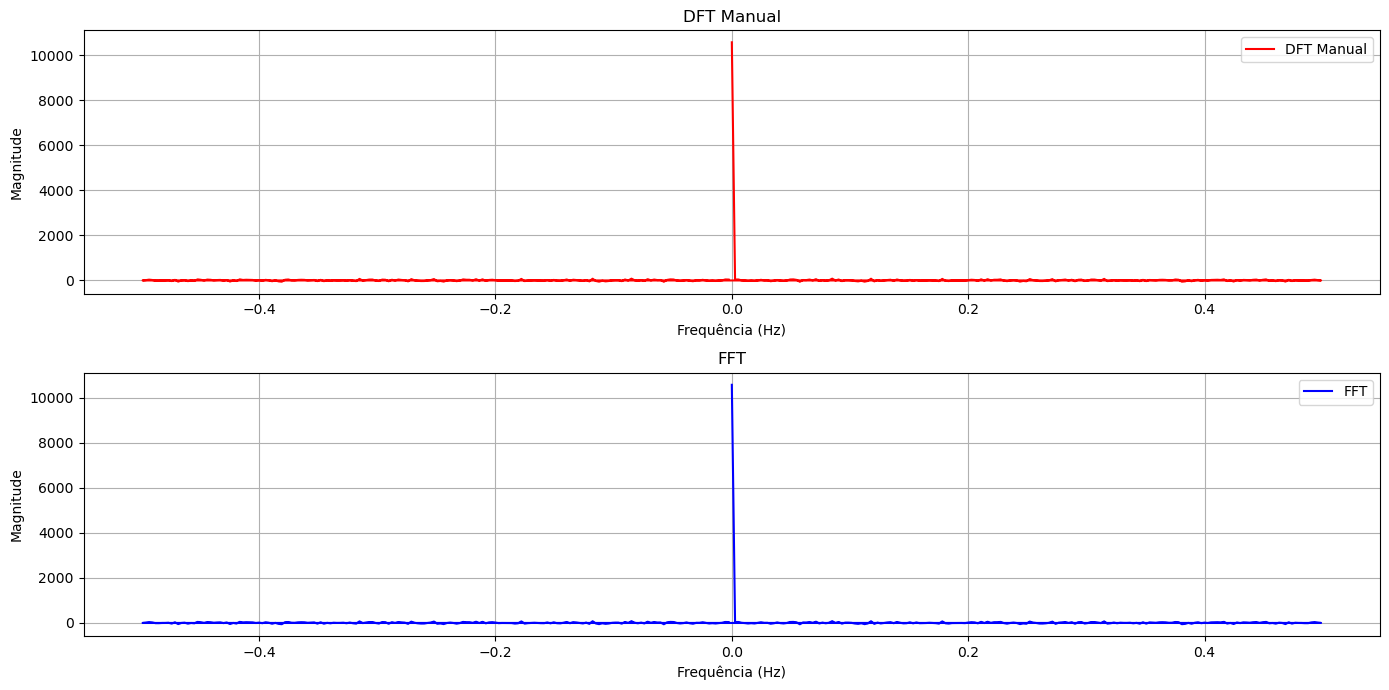

In [328]:
# Calcular a DFT manualmente
dft_result = br.DFT(temperaturas)

# Calcular a FFT
fft_result = np.fft.fft(temperaturas)

# Frequências
frequencias = np.fft.fftfreq(len(dias))

# Plotar os resultados
plt.figure(figsize=(14, 7))

# Plotar o módulo da DFT
plt.subplot(2, 1, 1)
plt.plot(frequencias, dft_result, label='DFT Manual', color='red')
plt.xlabel('Frequência (Hz)')
plt.ylabel('Magnitude')
plt.title('DFT Manual')
plt.legend()
plt.grid(True)

# Plotar o módulo da FFT
plt.subplot(2, 1, 2)
plt.plot(frequencias, fft_result, label='FFT', color='blue')
plt.xlabel('Frequência (Hz)')
plt.ylabel('Magnitude')
plt.title('FFT')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()

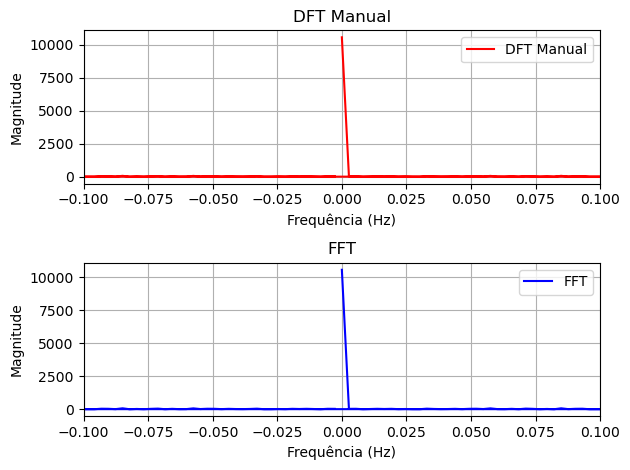

In [329]:
# Plotar o módulo da DFT
plt.subplot(2, 1, 1)
plt.plot(frequencias, np.abs(dft_result.real), label='DFT Manual', color='red')
plt.xlabel('Frequência (Hz)')
plt.ylabel('Magnitude')
plt.title('DFT Manual')
plt.xlim(-0.1, 0.1)
plt.legend()
plt.grid(True)

# Plotar o módulo da FFT
plt.subplot(2, 1, 2)
plt.plot(frequencias, np.abs(fft_result.real), label='FFT', color='blue')
plt.xlabel('Frequência (Hz)')
plt.ylabel('Magnitude')
plt.title('FFT')
plt.xlim(-0.1, 0.1)
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()

In [330]:
def low_pass_filter(freqs, cutoff):
    """
    Cria um filtro passa-baixa.

    Parameters:
    freqs (numpy array): Frequências associadas à FFT.
    cutoff (float): Frequência de corte para o filtro passa-baixa.

    Returns:
    numpy array: Filtro passa-baixa aplicado às frequências.
    """
    filter_mask = np.abs(freqs) < cutoff
    return filter_mask

In [331]:
sig = low_pass_filter(frequencias, 1/2500)

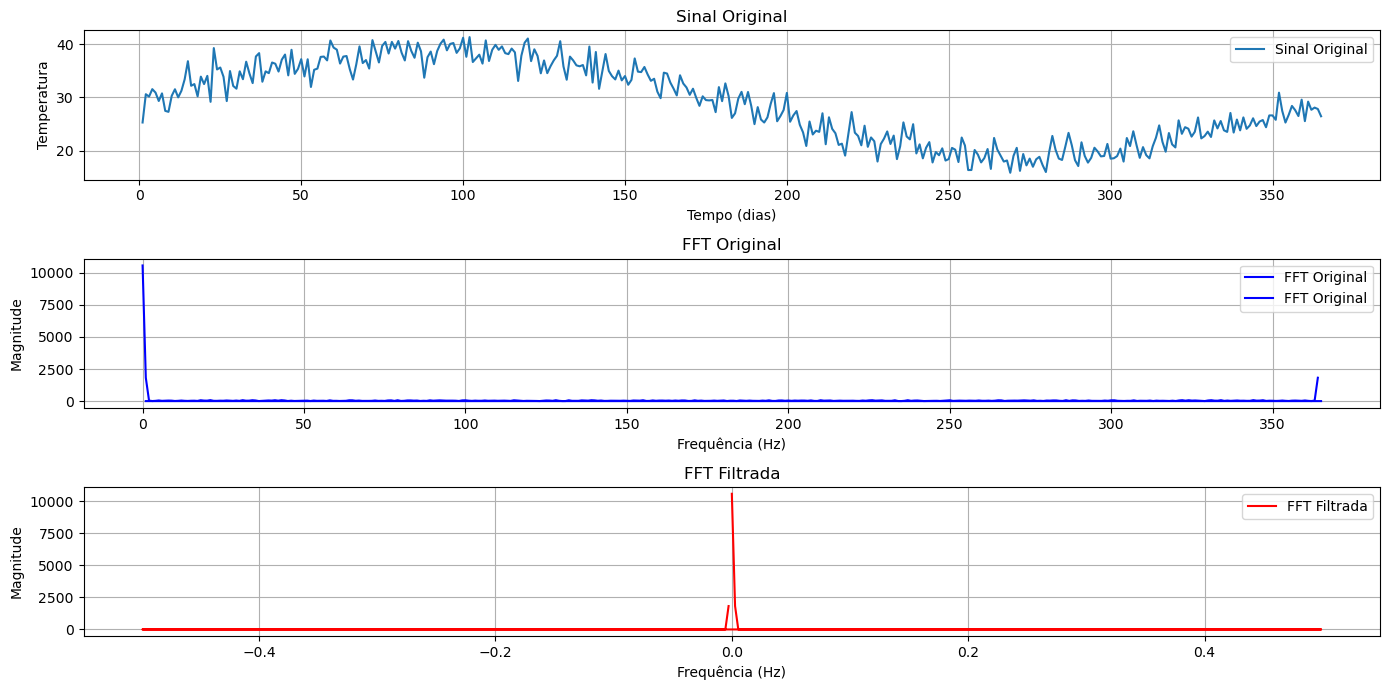

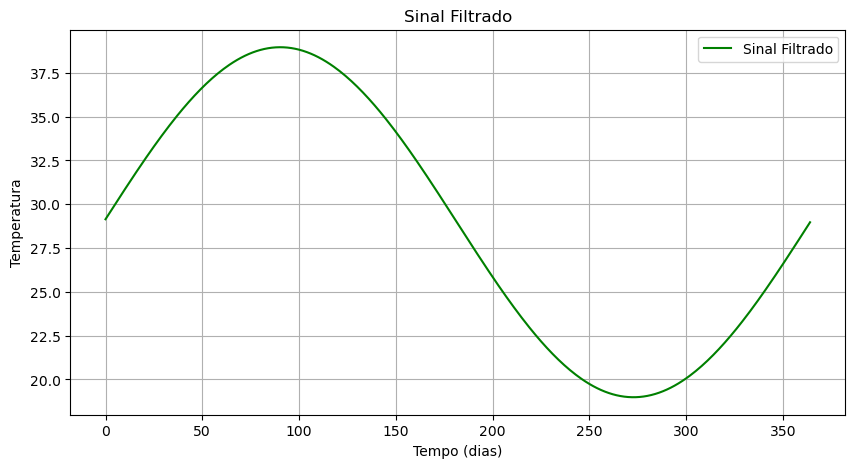

In [332]:
# Aplicar filtro passa-baixa
cutoff_frequency = 1/250  # Ajuste a frequência de corte conforme necessário
filter_mask = low_pass_filter(frequencias, cutoff_frequency)
filtered_fft_result = fft_result * filter_mask

# Aplicar a IFFT para obter o sinal filtrado
filtered_dados = np.fft.ifft(filtered_fft_result)

# Plotar resultados
plt.figure(figsize=(14, 7))

# Plotar o sinal original
plt.subplot(3, 1, 1)
plt.plot(dias, temperaturas, label='Sinal Original')
plt.xlabel('Tempo (dias)')
plt.ylabel('Temperatura')
plt.title('Sinal Original')
plt.legend()
plt.grid(True)

# Plotar o módulo da FFT original
plt.subplot(3, 1, 2)
plt.plot(dias, frequencias, np.abs(fft_result), label='FFT Original', color='blue')
plt.xlabel('Frequência (Hz)')
plt.ylabel('Magnitude')
plt.title('FFT Original')
plt.legend()
plt.grid(True)

# Plotar o módulo da FFT filtrada
plt.subplot(3, 1, 3)
plt.plot(frequencias, np.abs(filtered_fft_result), label='FFT Filtrada', color='red')
plt.xlabel('Frequência (Hz)')
plt.ylabel('Magnitude')
plt.title('FFT Filtrada')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()

# Plotar o sinal filtrado
plt.figure(figsize=(10, 5))
plt.plot(filtered_dados.real, label='Sinal Filtrado', color='green')
plt.xlabel('Tempo (dias)')
plt.ylabel('Temperatura')
plt.title('Sinal Filtrado')
plt.legend()
plt.grid(True)
plt.show()

In [333]:
def high_pass_filter(freqs, cutoff):
    """
    Cria um filtro passa-baixa.
    
    Parameters:
    freqs (numpy array): Frequências associadas à FFT.
    cutoff (float): Frequência de corte para o filtro passa-baixa.

    Returns:
    numpy array: Filtro passa-baixa aplicado às frequências.
    """
    filter_mask = np.abs(freqs) > cutoff
    return filter_mask

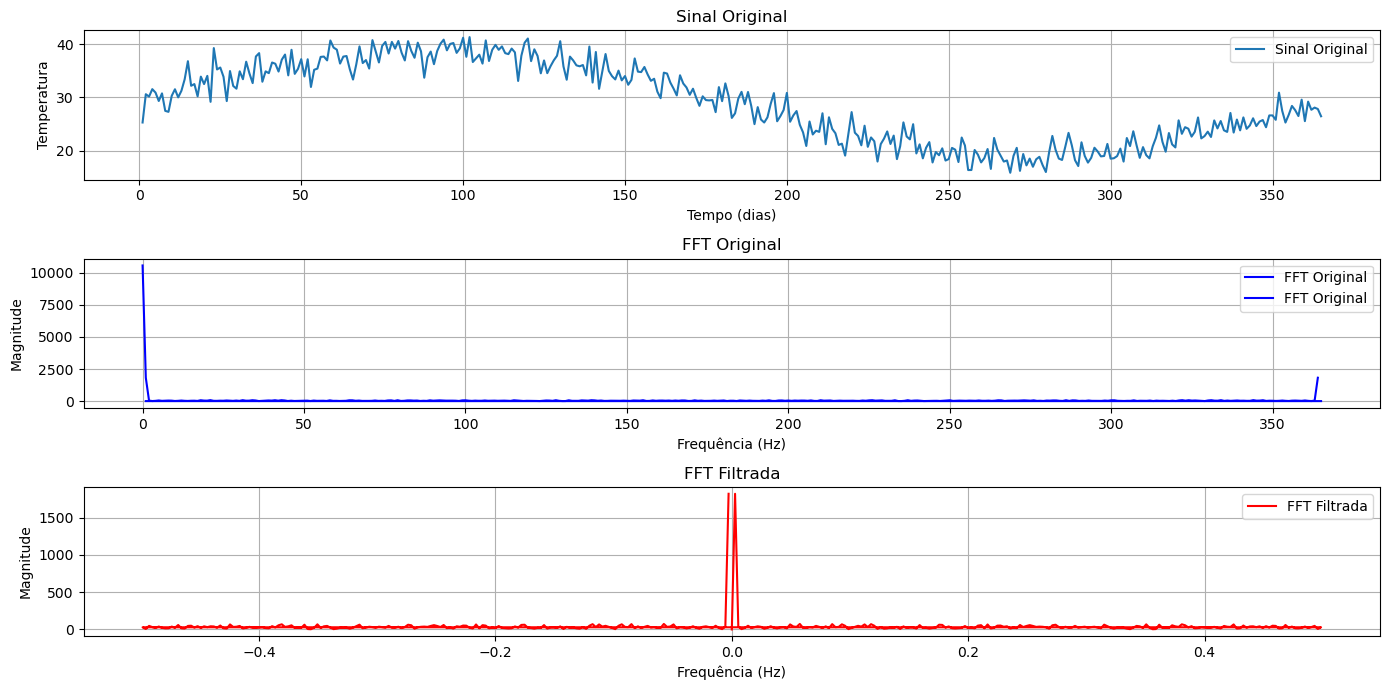

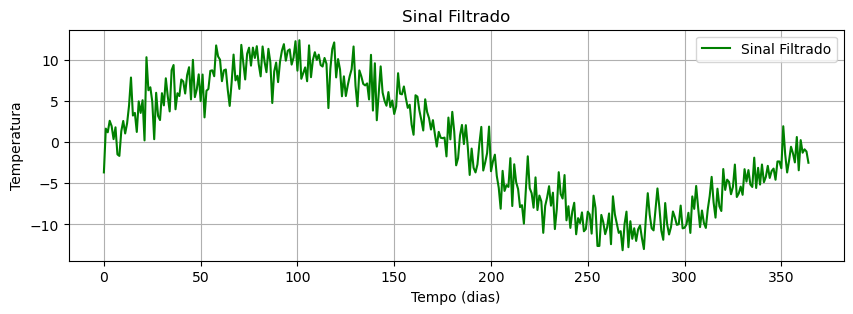

In [334]:
# Aplicar filtro passa-baixa
cutoff_frequency = 1/10000  # Ajuste a frequência de corte conforme necessário
filter_mask = high_pass_filter(frequencias, cutoff_frequency)
filtered_fft_result = fft_result * filter_mask

# Aplicar a IFFT para obter o sinal filtrado
filtered_dados = np.fft.ifft(filtered_fft_result)

# Plotar resultados
plt.figure(figsize=(14, 7))

# Plotar o sinal original
plt.subplot(3, 1, 1)
plt.plot(dias, temperaturas, label='Sinal Original')
plt.xlabel('Tempo (dias)')
plt.ylabel('Temperatura')
plt.title('Sinal Original')
plt.legend()
plt.grid(True)

# Plotar o módulo da FFT original
plt.subplot(3, 1, 2)
plt.plot(dias, frequencias, np.abs(fft_result), label='FFT Original', color='blue')
plt.xlabel('Frequência (Hz)')
plt.ylabel('Magnitude')
plt.title('FFT Original')
plt.legend()
plt.grid(True)

# Plotar o módulo da FFT filtrada
plt.subplot(3, 1, 3)
plt.plot(frequencias, np.abs(filtered_fft_result), label='FFT Filtrada', color='red')
plt.xlabel('Frequência (Hz)')
plt.ylabel('Magnitude')
plt.title('FFT Filtrada')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()

# Plotar o sinal filtrado
plt.figure(figsize=(10, 3))
plt.plot(filtered_dados.real, label='Sinal Filtrado', color='green')
plt.xlabel('Tempo (dias)')
plt.ylabel('Temperatura')
plt.title('Sinal Filtrado')
plt.legend()
plt.grid(True)
plt.show()

## IDFT

In [335]:
br.IDFT(dft_result)

array([25.29233017-6.97831613e-11j, 30.61278532-5.35063208e-11j,
       30.16338162-4.60434807e-11j, 31.56376107-4.13035183e-11j,
       30.92058236-3.71080068e-11j, 29.33754231-3.31548195e-11j,
       30.76915041-3.00999140e-11j, 27.48092505-2.93748100e-11j,
       27.29593348-2.69945503e-11j, 30.30601891-2.41663955e-11j,
       31.54376303-2.29279877e-11j, 30.01891101-2.10174259e-11j,
       31.26333731-1.92445341e-11j, 33.4170516 -1.87474267e-11j,
       36.82003438-1.71639093e-11j, 32.19970284-1.64257235e-11j,
       32.52073824-1.54389840e-11j, 30.20834612-1.39196295e-11j,
       33.91867039-1.31851814e-11j, 32.52030637-1.23996521e-11j,
       34.06331136-1.17343505e-11j, 29.17925824-9.78890393e-12j,
       39.28650748-9.16160177e-12j, 35.27306191-1.01365053e-11j,
       35.6323881 -9.61572618e-12j, 33.89247288-8.29446709e-12j,
       29.3241527 -7.52575719e-12j, 34.96565871-7.27471173e-12j,
       32.15816678-6.67357311e-12j, 31.65177324-5.45323056e-12j,
       34.91544063-4.5979

Text(0.5, 0, 'tempo (dias)')

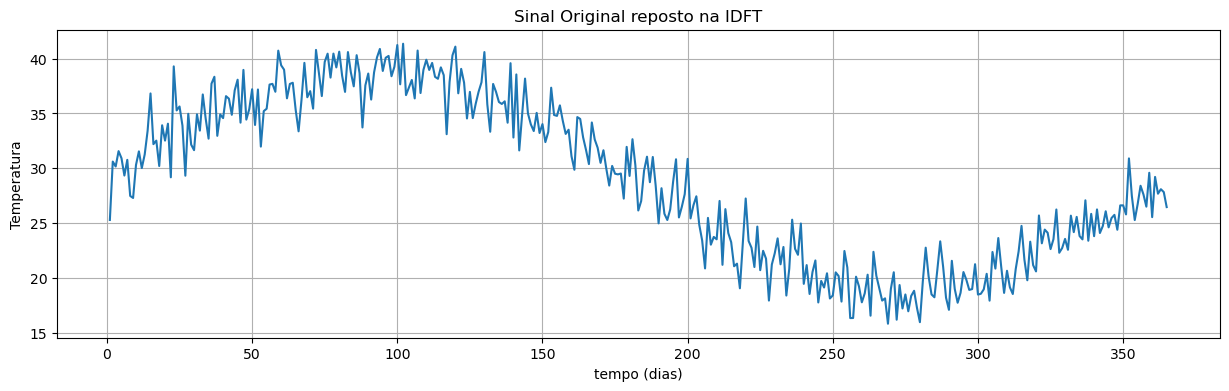

In [336]:
plt.figure(figsize=(15, 4))
plt.plot(dias, br.IDFT(dft_result))
plt.grid()
plt.title('Sinal Original reposto na IDFT')
plt.ylabel('Temperatura')
plt.xlabel('tempo (dias)')